<a href="https://colab.research.google.com/github/nuruldinikamilah/My-project/blob/main/Analisa_Banjir_di_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas==1.3.5
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.0 MB/s eta 0:00:00


In [ ]:
import pandas
import numpy
import folium
import geopandas as gpd
import plotly.graph_objects as go
import json
import plotly.express as px
import re
import statistics
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [ ]:
! unzip Data.zip

Archive:  Data.zip
   creating: Dataset/Banjir/
  inflating: Dataset/Banjir/banjir_jakarta_2013_2020.xlsx  
  inflating: Dataset/Banjir/banjir_jakarta_2013_2020_no_clean.xlsx  
  inflating: Dataset/Banjir/Curah hujan.csv  
  inflating: Dataset/Banjir/data_banjir_per_kab.csv  
  inflating: Dataset/Banjir/data_kecamatan_jak_sel_banjir.csv  
  inflating: Dataset/Banjir/data_kecamatan_jak_tim_banjir.csv  
  inflating: Dataset/Banjir/data_kel_kramat_jati_banjir.csv  
  inflating: Dataset/Banjir/data_kel_pasar_minggu_banjir.csv  
  inflating: Dataset/Banjir/Kejadian banjir pertahun.csv  
  inflating: Dataset/Banjir/Korelasi Jakarta.csv  
  inflating: Dataset/Banjir/Korelasi Jaktim.csv  
  inflating: Dataset/Banjir/rekap_ketinggian_banjir_2017_2020_revisi.csv  
  inflating: Dataset/Banjir/sea-level-rise.csv  
  inflating: Dataset/Banjir/tasmax_timeseries_annual_cru_1901-2021_IDN.csv  
  inflating: Dataset/Banjir/tasmin_timeseries_annual_cru_1901-2021_IDN.csv  
  inflating: Geojson/jakarta.geo

# Rumusan Masalah

1. Pada tahun berapa banjir di daerah tersebut sering terjadi?
2. Dari tahun 2013 hingga tahun 2020, di Jakarta mana banjir paling sering terjadi?
3. Mengacu pada data, apa penyebab terjadinya banjir di daerah tersebut dan di Jakarta?
4. Bagaimana ketinggian dan jumlah kejadian banjir kedepannya jika tidak ada perubahan yang dilakukan?



## 1. Pada tahun berapa banjir di daerah tersebut sering terjadi?
Untuk mengetahui jumlah kejadian banjir di Jakarta dari tahun 2013 hingga 2020, kami akan menggunakan data banjir yang diambil dari Geoportal Data Bencana Indonesia.

In [ ]:
data_banjir = pandas.read_excel("./Dataset/Banjir/banjir_jakarta_2013_2020.xlsx")

In [ ]:
data_banjir.head()

Unnamed: 0 Tanggal Kejadian  \
0           0       2020-12-06   
1           1       2020-12-06   
2           2       2020-11-01   
3           3       2020-11-01   
4           4       2020-11-01   

                                              Lokasi             Kabupaten  \
0               Kec. Pasar Minggu Kel. Pejaten Timur  KOTA JAKARTA SELATAN   
1  Kec. Pasar Rebo Kel. Gedong Kec. Jatinegara Ke...    KOTA JAKARTA TIMUR   
2                       Kec. Cilincing  Kel. Rorotan    KOTA JAKARTA UTARA   
3  Kec. Pasar Minggu Kel. Jati Padang  Kel. Cilan...  KOTA JAKARTA SELATAN   
4  Kec. Duren Sawit Kel. Duren Sawit Kel. Pondok ...    KOTA JAKARTA TIMUR   

      Provinsi                                           Penyebab  
0  DKI JAKARTA  Akibat hujan dengan intensitas tinggi dan melu...  
1  DKI JAKARTA  Akibat hujan dengan intensitas tinggi dan melu...  
2  DKI JAKARTA  • Akibat curah hujan tinggi dan luapan sungai ...  
3  DKI JAKARTA  • Akibat curah hujan tinggi dan luapan sungai ...  
4  DKI JAKARTA  • Akibat curah hujan tinggi dan luapan sungai ...

In [ ]:
data_banjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        197 non-null    int64         
 1   Tanggal Kejadian  197 non-null    datetime64[ns]
 2   Lokasi            197 non-null    object        
 3   Kabupaten         197 non-null    object        
 4   Provinsi          197 non-null    object        
 5   Penyebab          197 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.4+ KB


In [ ]:
data_banjir.shape

(197, 6)

Terjadi <b>197</b> kali kejadian banjir di seluruh kota Jakarta.

In [ ]:
fig = px.bar(x=data_banjir["Tanggal Kejadian"].dt.year.value_counts().sort_index().index[-3:],
             y=data_banjir["Tanggal Kejadian"].dt.year.value_counts().sort_index().values[-3:],
             color=data_banjir["Tanggal Kejadian"].dt.year.value_counts().sort_index().values[-3:],
             text=data_banjir["Tanggal Kejadian"].dt.year.value_counts().sort_index().values[-3:],
             labels={"y":"Jumlah Banjir yang Terjadi","x":"Tahun","color":"Jumlah Banjir yang Terjadi"},
             color_continuous_scale=px.colors.sequential.Reds,
             title="Grafik Jumlah Banjir di DKI Jakarta Dari Tahun 2013-2020",
             log_x=False,log_y=False)
fig.update_layout(xaxis={'dtick': 1})
fig.update_traces(textposition='outside')
fig.show()

Banjir di Jakarta sering terjadi pada tahun 2020. Hal ini didukung oleh pernyataan,
>"Curah hujan pada 1 Januari 2020 di sekitar Jakarta, menurut Badan Meteorologi, Klimatologi, dan Geofisika (BMKG), termasuk yang paling ekstrem dan tertinggi sejak  154 tahun lalu. Banjir yang dipicu hujan besar menenggelamkan sebagian  ibukota negara dan kota-kota penyangga sekitarnya.
Sampai hari ini, lebih dari 50 orang tewas dan lebih dari 170 ribu orang menjadi pengungsi dadakan karena rumah mereka tersapu air bah."
<br>
-<a href="https://theconversation.com/banjir-besar-di-jakarta-awal-2020-penyebab-dan-saatnya-mitigasi-bencana-secara-radikal-129324">The Conversation, 2020</a>
>



## 2. Dari tahun 2013 hingga tahun 2020, di Jakarta mana banjir paling sering terjadi?

In [ ]:
himpunan_kab=[]
for kab in data_banjir["Kabupaten"]:
    himpunan_kab.append(kab.title())
data_banjir["Kabupaten"]=himpunan_kab

In [ ]:
with open ('./Geojson/jakarta.geojson','r') as file_json:
    peta_jakarta = json.load(file_json)

In [ ]:
data_banjir_per_kab = data_banjir["Kabupaten"].value_counts()

In [ ]:
fig = px.choropleth_mapbox(data_banjir_per_kab, geojson=peta_jakarta, locations=data_banjir_per_kab.index, color=data_banjir_per_kab.values,
                           color_continuous_scale="reds",
                           mapbox_style="open-street-map",
                           featureidkey="properties.name",
                           zoom=9.7, center = {"lat": -6.200000, "lon": 106.816666},
                           opacity=0.8,
                           labels={'color':'Jumlah kejadian banjir','index':'Kota'},
                           title="<b>Peta DKI Jakarta Dengan Jumlah Kejadian Banjir Dari Tahun 2013-2020",
                           template="plotly_dark",
                          )

fig.update_traces(text=data_banjir_per_kab.values,
                  hovertemplate='<b>%{location}</b><br><br>Jumlah Kejadian: %{text}')

fig.update_layout(margin={"r":0,"t":45,"l":0,"b":0})

fig.show()

Dari peta tersebut, kita dapat melihat bahwa sebanyak *79 kali* atau *40%* dari banjir yang terjadi di Jakarta pada tahun 2013 hingga 2020 terjadi di Jakarta Timur.

## 3. Mengacu pada data, apa penyebab terjadinya banjir di Jakarta?

Untuk mengetahui faktor terbanyak, kita akan melakukan text processing terhadap kolom 'penyebab' pada data banjir yang berisi penjelasan dari penyebab terjadinya banjir.

In [ ]:
data_banjir_wc = data_banjir["Penyebab"].dropna(axis=0,how='any')

In [ ]:
kata_regek=[]
for i in data_banjir_wc:
    replacements = {
        ' ':' ',
        '  ': ' ',
        '•':''
    }
    pola = re.compile('|'.join(re.escape(key) for key in replacements.keys()))
    output = pola.sub(lambda match: replacements[match.group(0)], i)
    kata_regek.append(output.lower().lstrip())
data_banjir_wc=kata_regek

In [ ]:
data_banjir_wc

['akibat hujan dengan intensitas tinggi dan meluapnya kali ciliwung',
 'akibat hujan dengan intensitas tinggi dan meluapnya kali ciliwung',
 'akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka',
 'akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka',
 'akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka',
 'hujan deras pada sore hingga malam hari, menyebabkan meluapnya sungai ciliwung dan sungai pesanggrahan',
 'hujan deras pada sore hingga malam hari, menyebabkan meluapnya sungai ciliwung dan sungai pesanggrahan',
 'akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta',
 'akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta',
 'akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta',
 'akibat hujan dengan intensitas tinggi yang terjadi cukup lama sehingga menyebabkan banjir genangan di beberapa wilayah di prov. dki jakar

In [ ]:
teks = " ".join(penyebab for penyebab in data_banjir_wc)
print(f"Ada sekitar {len(teks)} kata dalam kolom penyebab banjir")

Ada sekitar 3549 kata dalam kolom penyebab banjir


In [ ]:
import json
id_stopwords=[]
with open("stopwords-id.json","r") as file:
    data_stopwords = json.load(file)
    for i in data_stopwords:
        id_stopwords.append(i)
    file.close()

In [ ]:
stopwords = set(id_stopwords)
stopwords.update(["dki jakarta","bogor","akibat","banjir","menyebabkan","prov","0"])

In [ ]:
teks

'akibat hujan dengan intensitas tinggi dan meluapnya kali ciliwung akibat hujan dengan intensitas tinggi dan meluapnya kali ciliwung akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka akibat curah hujan tinggi dan luapan sungai ciliwung, kali krukut serta phb malaka hujan deras pada sore hingga malam hari, menyebabkan meluapnya sungai ciliwung dan sungai pesanggrahan hujan deras pada sore hingga malam hari, menyebabkan meluapnya sungai ciliwung dan sungai pesanggrahan akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta akibat hujan dengan intensitas tinggi di wilayah hulu dan wilayah dki jakarta akibat hujan dengan intensitas tinggi yang terjadi cukup lama sehingga menyebabkan banjir genangan di beberapa wilayah di prov. dki jakarta akibat hujan dengan intensitas tinggi 

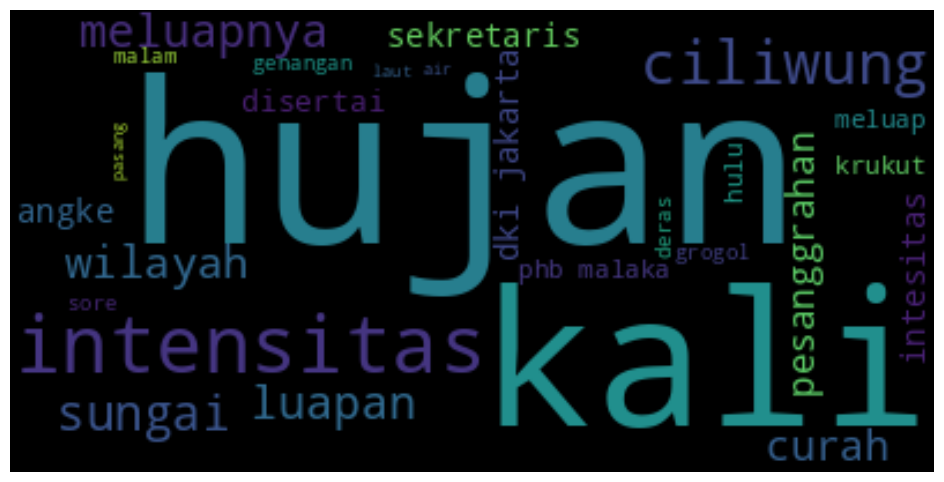

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100).generate(teks)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dari data tersebut, penyebab banjir paling banyak adalah intensitas curah hujan yang tinggi sehingga menyebabkan meluapnya sungai/kali terutama kali ciliwung. Hal ini didukung oleh sebuah pernyataan,
>"Gubernur DKI Jakarta Anies Baswedan menyatakan bahwa banjir di Ibu Kota, pada Senin (10/10/2022), terjadi karena volume air hujan yang melampaui kapasitas drainase."<br>-
<a href="https://megapolitan.kompas.com/read/2022/10/11/13323321/anies-sebut-jakarta-banjir-karena-volume-air-hujan-melampaui-kapasitas?page=all#:~:text=JAKARTA%2C%20KOMPAS.com%20%2D%20Gubernur,hujan%20yang%20melampaui%20kapasitas%20drainase.">Kompas, 2022</a>
>
Untuk membuktikan apakah benar dikarenakan curah hujan dan ketinggian air laut yang menyebabkan meluapnya air sungai/kali, mari kita melihat 3 letak kelurahan yang paling sering banjir di 2 kota DKI Jakarta yang paling sering terjadi banjir menurut diagram choropleth tadi. Apakah daerah tersebut berlokasi dekat dengan sungai?

### Letak Geografis

#### a. Jakarta Selatan

In [ ]:
data_banjir_jaksel=data_banjir[data_banjir["Kabupaten"]=="Kota Jakarta Selatan"]

In [ ]:
data_banjir_jaksel['Lokasi']

0                   Kec. Pasar Minggu Kel. Pejaten Timur
3      Kec. Pasar Minggu Kel. Jati Padang  Kel. Cilan...
6      Kec. Pasar Minggu Kel. Pejaten Timur Kec. Panc...
9      Kec. Mampang Prapatan  (1 Kelurahan) Kec. Cila...
11     Kec. Kebayoran Lama Kel. Kebayoran Lama Selata...
14                                                     0
19     Kec. Pasar Minggu Kel. Klaten Timur Kec. Panco...
20     Kec. Pasar Minggu Kel. Pejaten Timur Kec. Tebe...
22     Kec. Pasar Minggu Kel. Pejaten Timur Kel. Jati...
25     Kec. Kebayoran Baru Kel. Gandaria Utara Kel. P...
27                        Kec. Cilandak Kel. Lebak Bulus
32     Kel. Guntur Kel. Pasar Manggis Kel. Karet Sema...
35     Kec. Setiabudi Kel. Guntur Kel. Pasar Manggis ...
40     Kec. Pasar Minggu Kel. Pejaten Timur  Kec. Pan...
46                  Kec. Pasar Minggu Kel. Pejaten Timur
49     Kec. Pasar Minggu Kel. Pejaten Timur Kec. Panc...
53       Kec. Cilandak Kel. Pondok Baru Kel. Lebak Bulus
54     Kec. Pancoran Kel. Kalib

In [ ]:
himpunan_nilai_baru=[]
for i in data_banjir_jaksel["Lokasi"]:
    if isinstance(i, str) == True:
        i = i.lower()
        replacements = {
            'KEC':'kec.',
            'kec. jagakarsa':'jagakarsa_',
            'kec. cilandak':'cilandak_',
            'kec. pancoran':'pancoran_',
            'kec. pesanggrahan':'pesanggrahan_',
            'kec. setiabudi':'setiabudi_',
            'kec. tebet':'tebet_',
            'kec. kebayoran baru':'kebayoran_baru',
            'kec. kebayoran lama':'kebayoran_lama',
            'kec. mampang prapatan':'mampang_prapatan',
            'kec. pasar minggu':'pasar_minggu'
            }
        pola = re.compile('|'.join(re.escape(key) for key in replacements.keys()))
        output = pola.sub(lambda match: replacements[match.group(0)], i)
        himpunan_nilai_baru.append(output)
    else:
        himpunan_nilai_baru.append("None")
data_banjir_jaksel["Lokasi"]=himpunan_nilai_baru
#himpunan_nilai_baru

<ipython-input-23-9da1dbc4d3b6>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
himpunan_nilai_baru

['pasar_minggu kel. pejaten timur',
 'pasar_minggu kel. jati padang  kel. cilandak timur',
 'pasar_minggu kel. pejaten timur pancoran_ kel. rawajati kel. pengadegan tebet_ kel. kebon baru kel. manggarai pesanggrahan_ kel. bintaro kebayoran_lama kel. pondok pinang kel. cipulir',
 'mampang_prapatan  (1 kelurahan) cilandak_ (2 kelurahan) pesanggrahan_  (2 kelurahan) pasar_minggu  (3 kelurahan) kebayoran_lama  (2 kelurahan)',
 'kebayoran_lama kel. kebayoran lama selatan kel. grogol selatan cilandak_ kel. cipete selatan, kebayoran_baru  kel. petogogan mampang_prapatan kel. pela mampang,  kebayoran_baru kel. cipete utara, kel. gunung  kel.  petogogan pasar_minggu kel. pejaten barat,  tebet_ kel. kebon baru pancoran_ kel. kalibata, jagakarsa_  kel. jagakarsa, kec. kramat jati',
 '0',
 'pasar_minggu kel. klaten timur pancoran_ kel. rawajati kebayoran_lama kel. pondok pinang',
 'pasar_minggu kel. pejaten timur tebet_ kel. kebon baru kel. manggarai pancoran_ kel. pegadegan kel. rawajati kebayora

In [ ]:
data_kecamatan_jak_sel_banjir = {"Cilandak":0,
                                 "Jagakarsa":0,
                                 "Kebayoran Baru":0,
                                 "Kebayoran Lama":0,
                                 "Mampang Prapatan":0,
                                 "Pancoran":0,
                                 "Pasar Minggu":0,
                                 "Pesanggrahan":0,
                                 "Setiabudi":0,
                                 "Tebet":0}

In [ ]:
for i in data_banjir_jaksel["Lokasi"]:
    if "cilandak_" in i:
        data_kecamatan_jak_sel_banjir["Cilandak"]+=1
    if "jagakarsa_" in i:
        data_kecamatan_jak_sel_banjir["Jagakarsa"]+=1
    if "kebayoran_baru" in i:
        data_kecamatan_jak_sel_banjir["Kebayoran Baru"]+=1
    if "kebayoran_lama" in i:
        data_kecamatan_jak_sel_banjir["Kebayoran Lama"]+=1
    if "mampang_prapatan" in i:
        data_kecamatan_jak_sel_banjir["Mampang Prapatan"]+=1
    if "pasar_minggu" in i:
        data_kecamatan_jak_sel_banjir["Pasar Minggu"]+=1
    if "pancoran_" in i:
        data_kecamatan_jak_sel_banjir["Pancoran"]+=1
    if "pesanggrahan_" in i:
        data_kecamatan_jak_sel_banjir["Pesanggrahan"]+=1
    if "setiabudi_" in i:
        data_kecamatan_jak_sel_banjir["Setiabudi"]+=1
    if "tebet_" in i:
        data_kecamatan_jak_sel_banjir["Tebet"]+=1

In [ ]:
data_kecamatan_jak_sel_banjir

{'Cilandak': 5,
 'Jagakarsa': 2,
 'Kebayoran Baru': 4,
 'Kebayoran Lama': 6,
 'Mampang Prapatan': 6,
 'Pancoran': 11,
 'Pasar Minggu': 15,
 'Pesanggrahan': 2,
 'Setiabudi': 2,
 'Tebet': 7}

In [ ]:
data_kecamatan_jak_sel_banjir = pandas.DataFrame(list(data_kecamatan_jak_sel_banjir.items()),
                                                 columns = ['Kecamatan','Jumlah Terdampak'])

In [ ]:
fig = px.bar(data_kecamatan_jak_sel_banjir.sort_values(by=['Jumlah Terdampak'],ascending=False).head(3),
             x="Kecamatan",
             y="Jumlah Terdampak",
             color="Jumlah Terdampak",
             title="3 Kecamatan di Jakarta Selatan dengan Jumlah Terdampak Banjir Terbanyak",
             color_continuous_scale=px.colors.sequential.Reds
            )
fig.show()

In [ ]:
data_sungai_sel = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_SELATAN/SUNGAI_AR_25K.shp")

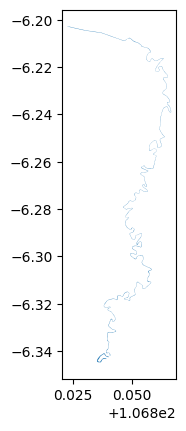

In [ ]:
data_sungai_sel.plot()
plt.show()

In [ ]:
data_sungai_ln_sel = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_SELATAN/SUNGAI_LN_25K.shp")

In [ ]:
data_kecamatan_jaksel= gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_SELATAN/ADMINISTRASIKECAMATAN_AR_25K.shp")

In [ ]:
m = folium.Map(location=[-6.273298, 106.869469], zoom_start=12, tiles="cartodbpositron")
tol=0.0001
for _, r in data_kecamatan_jaksel.iterrows():
    if r["NAMOBJ"]=="Pasar Minggu":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Red",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Pancoran":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Tebet":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
m

In [ ]:
for _, r in data_sungai_sel.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": "blue",
                                                                "weight": 2,})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
for _, r in data_sungai_ln_sel.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue",
                                                                 "color": "blue",
                                                                 "weight": 1})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
kel_jaksel={
    "Pejaten Barat":0,
    "Pejaten Timur":0,
    "Pasar Minggu":0,
    "Kebagusan":0,
    "Jati Padang":0,
    "Ragunan":0,
    "Cilandak Timur":0
}

In [ ]:
himpunan_nilai_kel=[]
for i in data_banjir_jaksel["Lokasi"]:
    if isinstance(i, str) == True:
        i = i.lower()
        replacements = {
            'kel. pejaten barat':'pejaten_barat',
            'kel. pejaten timur':'pejaten_timur',
            'kel. pasar minggu':'pasar_minggu_',
            'kel. jati padang':'jati_padang',
            'kel. cilandak timur':'cilandak_timur',
            }
        pola = re.compile('|'.join(re.escape(key) for key in replacements.keys()))
        output = pola.sub(lambda match: replacements[match.group(0)], i)
        himpunan_nilai_kel.append(output)
    else:
        himpunan_nilai_kel.append("None")
data_banjir_jaksel["Lokasi"]=himpunan_nilai_kel

<ipython-input-37-929248258359>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in data_banjir_jaksel["Lokasi"]:
    if "pejaten_barat" in i:
        kel_jaksel["Pejaten Barat"]+=1
    if "pejaten_timur" in i:
        kel_jaksel["Pejaten Timur"]+=1
    if "pasar_minggu_" in i:
        kel_jaksel["Pasar Minggu"]+=1
    if "jati_padang" in i:
        kel_jaksel["Jati Padang"]+=1
    if "cilandak_timur" in i:
        kel_jaksel["Cilandak Timur"]+=1
    if "kebagusan" in i:
        kel_jaksel["Kebagusan"]+=1
    if "ragunan" in i:
        kel_jaksel["Ragunan"]+=1

In [ ]:
data_kel_pasar_minggu_banjir = pandas.DataFrame(list(kel_jaksel.items()),
                                                 columns = ['Kelurahan','Jumlah Kejadian'])

In [ ]:
data_kel_pasar_minggu_banjir.to_csv("data_kel_pasar_minggu_banjir.csv")

In [ ]:
fig = px.bar(data_kel_pasar_minggu_banjir.sort_values(by=['Jumlah Kejadian'],ascending=False).head(2),
             x="Kelurahan",y="Jumlah Kejadian",
             color="Jumlah Kejadian",
             title="2 Kelurahan di Pasar Minggu dengan Jumlah Kejadian Banjir Terbanyak",
             color_continuous_scale=px.colors.sequential.Reds)
fig.show()

In [ ]:
data_shp_kel_jak_sel = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_SELATAN/ADMINISTRASIDESA_AR_25K.shp")
data_shp_kel_jak_sel.head()

KDPPUM              NAMOBJ                               REMARK  KDPBPS  \
0     NaN  Petukangan Selatan  Wilayah Administrasi Keluruhan/Desa     NaN   
1     NaN            Ciganjur  Wilayah Administrasi Keluruhan/Desa     NaN   
2     NaN         Pasarminggu  Wilayah Administrasi Keluruhan/Desa     NaN   
3     NaN      Srengsengsawah  Wilayah Administrasi Keluruhan/Desa     NaN   
4     NaN      Cilandak Barat  Wilayah Administrasi Keluruhan/Desa     NaN   

   FCODE  LUASWH  UUPP  SRS_ID   LCODE  METADATA  ...        WADMKC  WIADKC  \
0    NaN     0.0   NaN     NaN  BA0020       NaN  ...  Pesanggrahan     NaN   
1    NaN     0.0   NaN     NaN  BA0020       NaN  ...     Jagakarsa     NaN   
2    NaN     0.0   NaN     NaN  BA0020       NaN  ...  Pasar Minggu     NaN   
3    NaN     0.0   NaN     NaN  BA0020       NaN  ...     Jagakarsa     NaN   
4    NaN     0.0   NaN     NaN  BA0020       NaN  ...      Cilandak     NaN   

                 WADMKK  WIADKK       WADMPR  WIADPR  TIPADM  SHAPE_Leng  \
0  Kota Jakarta Selatan     NaN  DKI Jakarta     NaN       0    0.056290   
1  Kota Jakarta Selatan     NaN  DKI Jakarta     NaN       0    0.089652   
2  Kota Jakarta Selatan     NaN  DKI Jakarta     NaN       0    0.067230   
3  Kota Jakarta Selatan     NaN  DKI Jakarta     NaN       0    0.112938   
4  Kota Jakarta Selatan     NaN  DKI Jakarta     NaN       0    0.104542   

  SHAPE_Area                                           geometry  
0   0.000171  POLYGON Z ((106.76057 -6.23754 0.00000, 106.76...  
1   0.000301  POLYGON Z ((106.82264 -6.33835 0.00000, 106.82...  
2   0.000157  POLYGON Z ((106.84554 -6.27813 0.00000, 106.84...  
3   0.000510  POLYGON Z ((106.84330 -6.33141 0.00000, 106.84...  
4   0.000481  POLYGON Z ((106.81227 -6.27861 0.00000, 106.81...  

[5 rows x 28 columns]

In [ ]:
m = folium.Map(location=[-6.2617, 106.8699], zoom_start=13, tiles="cartodbpositron")
for _, r in data_shp_kel_jak_sel.iterrows():
    if r["NAMOBJ"]=="Pejaten Timur":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Red",
                                                                         "color": "black",
                                                                         "weight": 1,
                                                                         "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Pejaten Barat":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                         "color": "black",
                                                                         "weight": 1,
                                                                         "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)

m

In [ ]:
for _, r in data_sungai_sel.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": "blue",
                                                                "weight": 2,})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
for _, r in data_sungai_ln_sel.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue",
                                                                 "color": "blue",
                                                                 "weight": 1})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
m

2 Kelurahan di Jakarta Selatan yang paling sering banjir berdekatan dengan sungai Ciliwung.
#### b. Jakarta Timur

In [ ]:
data_banjir_jaktim=data_banjir[data_banjir["Kabupaten"]=="Kota Jakarta Timur"]

In [ ]:
data_banjir_jaktim.Lokasi.unique()

array(['Kec. Pasar Rebo Kel. Gedong Kec. Jatinegara Kel. Kampung Melayu Kel. Bidara Cina Kec. Kramat Jati Kel. Cililitan  Kel. Cawang',
       'Kec. Duren Sawit Kel. Duren Sawit Kel. Pondok Bambu Kec. Ciracas Kel. Susukan Kec. Jatinegara  Kel. Kampung Melayu Kec. Pulo Gadung Kec. Cipayung',
       'Kec. Kramat Jati Kel. Balekambang Kel. Cawang Kel. Cililitan Kec. Jatinegara Kel. Bidara Cina Kel. Kampung Melayu Kec. Ciracas Kel. Susukan  Kota Jakarta Barat  Kec. Kebon jeruk  Kel. Kedoya Selatan  Kec. Kembangan  Kel. Kembangan Selatan Kec. Pulo Gadung Kec. Cipayung',
       'Kec. Pasar Rebo  (2 Kelurahan)  Kec. Ciracas  (3 Kelurahan) Kec. Cipayung  Kel. Bambu Apus  (2 Kelurahan) Kec. Kramat Jati  (1 Kelurahan) Kec. Makasar  (2 Kelurahan) Kec. Jatinegara (1 Kelurahan)',
       'Kota Jakarta Timur Kec. Ciracas Kel. Rambutan Kota Jakarta Barat Kec. Kebon Jeruk Kel. Sukabumi Selatan Kel. Kedoya Utara Kel. Sukabumi Utara Kec. Kramat Jati',
       'Kec. Kramat Jati Kec. Jatinegara',
       'Ke

In [ ]:
data_banjir_jaktim["Lokasi"]

1      Kec. Pasar Rebo Kel. Gedong Kec. Jatinegara Ke...
4      Kec. Duren Sawit Kel. Duren Sawit Kel. Pondok ...
5      Kec. Kramat Jati Kel. Balekambang Kel. Cawang ...
7      Kec. Pasar Rebo  (2 Kelurahan)  Kec. Ciracas  ...
10     Kota Jakarta Timur Kec. Ciracas Kel. Rambutan ...
                             ...                        
185                                                    0
187                                                    0
189                                                    0
190                                                    0
195                                                    0
Name: Lokasi, Length: 79, dtype: object

Banjir di DKI Jakarta paling banyak terjadi pada tahun 2020.

In [ ]:
himpunan_nilai_baru=[]
for i in data_banjir_jaktim["Lokasi"]:
    if isinstance(i, str) == True:
        i = i.lower()
        replacements = {
            'KEC':'kec.',
            'kec. duren sawit':'duren_sawit',
            'kec. kramat jati':'kramat_jati',
            'kec. pasar rebo':'pasar_rebo',
            'kec. pulo gadung':'pulo_gadung'
            }
        pola = re.compile('|'.join(re.escape(key) for key in replacements.keys()))
        output = pola.sub(lambda match: replacements[match.group(0)], i)
        himpunan_nilai_baru.append(output)
    else:
        himpunan_nilai_baru.append("None")
data_banjir_jaktim["Lokasi"]=himpunan_nilai_baru
#himpunan_nilai_baru

<ipython-input-48-f3b9418843a7>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_kecamatan_jak_tim_banjir = {"Cakung":0,
                                 "Cipayung":0,
                                 "Ciracas":0,
                                 "Duren Sawit":0,
                                 "Jatinegara":0,
                                 "Kramat Jati":0,
                                 "Makasar":0,
                                 "Matraman":0,
                                 "Pasar Rebo":0,
                                 "Pulo Gadung":0}

In [ ]:
for i in data_banjir_jaktim["Lokasi"]:
    if "cakung" in i:
        data_kecamatan_jak_tim_banjir["Cakung"]+=1
    if "cipayung" in i:
        data_kecamatan_jak_tim_banjir["Cipayung"]+=1
    if "ciracas" in i:
        data_kecamatan_jak_tim_banjir["Ciracas"]+=1
    if "duren_sawit" in i:
        data_kecamatan_jak_tim_banjir["Duren Sawit"]+=1
    if "jatinegara" in i:
        data_kecamatan_jak_tim_banjir["Jatinegara"]+=1
    if "kramat_jati" in i:
        data_kecamatan_jak_tim_banjir["Kramat Jati"]+=1
    if "makasar" in i:
        data_kecamatan_jak_tim_banjir["Makasar"]+=1
    if "matraman" in i:
        data_kecamatan_jak_tim_banjir["Matraman"]+=1
    if "pasar_rebo" in i:
        data_kecamatan_jak_tim_banjir["Pasar Rebo"]+=1
    if "pulo_gadung" in i:
        data_kecamatan_jak_tim_banjir["Pulo Gadung"]+=1

In [ ]:
data_kecamatan_jak_tim_banjir

{'Cakung': 4,
 'Cipayung': 5,
 'Ciracas': 8,
 'Duren Sawit': 5,
 'Jatinegara': 13,
 'Kramat Jati': 24,
 'Makasar': 7,
 'Matraman': 5,
 'Pasar Rebo': 4,
 'Pulo Gadung': 4}

In [ ]:
data_kecamatan_jak_tim_banjir = pandas.DataFrame(list(data_kecamatan_jak_tim_banjir.items()),
                                                 columns = ['Kecamatan','Jumlah Terdampak'])

In [ ]:
data_kecamatan_jak_tim_banjir.to_csv("data_kecamatan_jak_tim_banjir.csv")

In [ ]:
fig = px.bar(data_kecamatan_jak_tim_banjir.sort_values(by=['Jumlah Terdampak'],ascending=False).head(3),
             x="Kecamatan",
             y="Jumlah Terdampak",
             color="Jumlah Terdampak",
             title="3 Kecamatan di Jakarta Timur dengan Jumlah Terdampak Banjir Terbanyak",
             color_continuous_scale=px.colors.sequential.Reds
            )
fig.show()

Dari 79 kejadian, 3 kecamatan dengan jumlah terdampak terbanyak termasuk ke daerah rawan banjir. Daerah dengan kejadian banjir terbanyak yaitu Kramat Jati. Apakah alasan terjadinya banjir karena meluapnya sungai dan curah hujan yang tinggi masuk akal? Mari coba kita petakan.

In [ ]:
data_sungai = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_TIMUR/SUNGAI_AR_25K.shp")

In [ ]:
data_sungai.head()

NAMOBJ  JNSSNG  KLSSNG  FCODE  REMARK  SRS_ID   LCODE  METADATA  \
0          NaN       0       0    NaN  Sungai     NaN  DA0280       NaN   
1  Kali Sunter       0       0    NaN  Sungai     NaN  DA0280       NaN   
2          NaN       0       0    NaN  Sungai     NaN  DA0280       NaN   
3    Ci Liwung       0       0    NaN  Sungai     NaN  DA0280       NaN   

   NAMWS  NAMDAS  SHAPE_Leng    SHAPE_Area  \
0    NaN     NaN    0.011139  9.817844e-07   
1    NaN     NaN    0.250019  2.478081e-05   
2    NaN     NaN    0.178854  2.132170e-05   
3    NaN     NaN    2.553908  2.647026e-04   

                                            geometry  
0  POLYGON Z ((106.86507 -6.24057 0.00000, 106.86...  
1  POLYGON Z ((106.89768 -6.17857 0.00000, 106.89...  
2  POLYGON Z ((106.92912 -6.18622 0.00000, 106.92...  
3  POLYGON Z ((106.85143 -6.20231 0.00000, 106.85...

In [ ]:
data_sungai_ln = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_TIMUR/SUNGAI_LN_25K.shp")

In [ ]:
data_sungai_ln

NAMOBJ  TIPSNG  KLSSNG  FCODE             REMARK  SRS_ID  LCODE  METADATA  \
0      NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
1      NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
2      NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
3      NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
4      NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
..     ...     ...     ...    ...                ...     ...    ...       ...   
171    NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
172    NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
173    NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
174    NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   
175    NaN       0       0    NaN  Sungai Satu Garis     NaN    NaN       NaN   

     NAMWS  NAMDAS  STATUS  WMAX  DBTMAX  SLPRT  SHAPE_Leng  \
0      NaN     NaN     NaN   0.0     0.0    0.0    0.018957   
1      NaN     NaN     NaN   0.0     0.0    0.0    0.029151   
2      NaN     NaN     NaN   0.0     0.0    0.0    0.001236   
3      NaN     NaN     NaN   0.0     0.0    0.0    0.003173   
4      NaN     NaN     NaN   0.0     0.0    0.0    0.028609   
..     ...     ...     ...   ...     ...    ...         ...   
171    NaN     NaN     NaN   0.0     0.0    0.0    0.008090   
172    NaN     NaN     NaN   0.0     0.0    0.0    0.016055   
173    NaN     NaN     NaN   0.0     0.0    0.0    0.008391   
174    NaN     NaN     NaN   0.0     0.0    0.0    0.000514   
175    NaN     NaN     NaN   0.0     0.0    0.0    0.008511   

                                              geometry  
0    LINESTRING Z (106.89852 -6.18414 0.00000, 106....  
1    LINESTRING Z (106.87892 -6.19672 0.00000, 106....  
2    LINESTRING Z (106.87845 -6.35105 0.00000, 106....  
3    LINESTRING Z (106.92373 -6.16463 0.00000, 106....  
4    MULTILINESTRING Z ((106.93994 -6.15300 0.00000...  
..                                                 ...  
171  LINESTRING Z (106.92441 -6.22414 0.00000, 106....  
172  LINESTRING Z (106.88061 -6.28970 0.00000, 106....  
173  LINESTRING Z (106.91885 -6.19847 0.00000, 106....  
174  LINESTRING Z (106.92930 -6.18677 0.00000, 106....  
175  LINESTRING Z (106.93165 -6.24935 0.00000, 106....  

[176 rows x 16 columns]

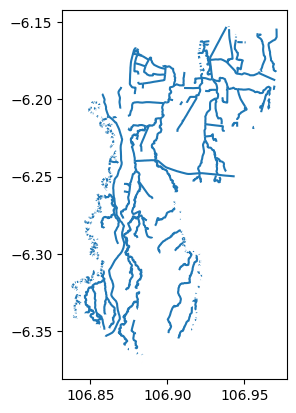

In [ ]:
data_sungai_ln.plot()
plt.show()

In [ ]:
data_sungai.crs

<Compound CRS: EPSG:9518>
Name: WGS 84 + EGM2008 height
Axis Info [ellipsoidal|vertical]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- H[up]: Gravity-related height (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
Sub CRS:
- WGS 84
- EGM2008 height

In [ ]:
data_sungai.shape

(4, 13)

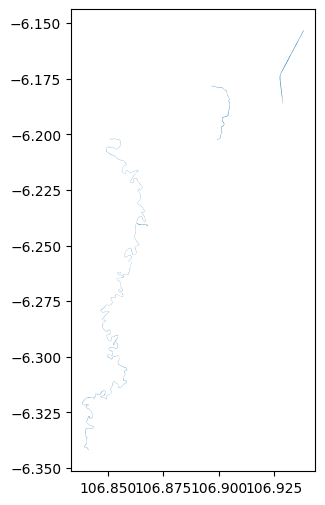

In [ ]:
data_sungai.plot(figsize=(6,6))
plt.show()

In [ ]:
data_kecamatan_jaktim = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_TIMUR/ADMINISTRASIKECAMATAN_AR_25K.shp")

In [ ]:
data_kecamatan_jaktim

KDPPUM       NAMOBJ                          REMARK  KDPBPS  FCODE  LUASWH  \
0     NaN       Cakung  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
1     NaN     Cipayung  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
2     NaN      Ciracas  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
3     NaN  Duren Sawit  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
4     NaN   Jatinegara  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
5     NaN   Kramatjati  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
6     NaN      Makasar  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
7     NaN     Matraman  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
8     NaN   Pasar Rebo  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   
9     NaN  Pulo Gadung  Wilayah Administrasi Kecamatan     NaN    NaN     0.0   

   UUPP  SRS_ID   LCODE  METADATA  ...  WADMKC  WIADKC              WADMKK  \
0   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
1   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
2   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
3   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
4   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
5   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
6   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
7   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
8   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   
9   NaN     NaN  BA0080       NaN  ...     NaN     NaN  Kota Jakarta Timur   

   WIADKK       WADMPR  WIADPR  TIPADM  SHAPE_Leng  SHAPE_Area  \
0     NaN  DKI Jakarta     NaN       0    0.268345    0.003307   
1     NaN  DKI Jakarta     NaN       0    0.272711    0.002245   
2     NaN  DKI Jakarta     NaN       0    0.240083    0.001365   
3     NaN  DKI Jakarta     NaN       0    0.190175    0.001783   
4     NaN  DKI Jakarta     NaN       0    0.172775    0.000844   
5     NaN  DKI Jakarta     NaN       0    0.270484    0.001077   
6     NaN  DKI Jakarta     NaN       0    0.240697    0.001758   
7     NaN  DKI Jakarta     NaN       0    0.095455    0.000402   
8     NaN  DKI Jakarta     NaN       0    0.245351    0.001040   
9     NaN  DKI Jakarta     NaN       0    0.148874    0.001254   

                                            geometry  
0  POLYGON Z ((106.95082 -6.21909 0.00000, 106.95...  
1  POLYGON Z ((106.89576 -6.37073 0.00000, 106.89...  
2  POLYGON Z ((106.88410 -6.30557 0.00000, 106.88...  
3  POLYGON Z ((106.90033 -6.21355 0.00000, 106.90...  
4  POLYGON Z ((106.87414 -6.21512 0.00000, 106.87...  
5  POLYGON Z ((106.87703 -6.24704 0.00000, 106.87...  
6  POLYGON Z ((106.89215 -6.23975 0.00000, 106.89...  
7  POLYGON Z ((106.87500 -6.19245 0.00000, 106.87...  
8  POLYGON Z ((106.86891 -6.30051 0.00000, 106.86...  
9  POLYGON Z ((106.91008 -6.18248 0.00000, 106.91...  

[10 rows x 28 columns]

In [ ]:
from folium.features import DivIcon
m = folium.Map(location=[-6.225014, 106.900447], zoom_start=11, tiles="cartodbpositron")
for _, r in data_kecamatan_jaktim.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
m = folium.Map(location=[-6.273298, 106.869469], zoom_start=12, tiles="cartodbpositron")
tol=0.0001
for _, r in data_kecamatan_jaktim.iterrows():
    if r["NAMOBJ"]=="Kramatjati":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Red",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Jatinegara":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Ciracas":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=tol)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                     "color": "black",
                                                                     "weight": 1,
                                                                     "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
m

Kita bisa melihat daerah berwarna merah merupakan Kramatjati, sedangkan daerah warna kuning merupakan 2 daerah teratas lainnya yang banyak terjadi banjir.

In [ ]:
for _, r in data_sungai.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": "blue",
                                                                "weight": 2,})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
for _, r in data_sungai_ln.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue",
                                                                 "color": "blue",
                                                                 "weight": 1})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
m

Dari peta tersebut, kita dapat melihat bahwa 3 kecamatan yang paling banyak terjadi banjir dilalui oleh sungai-sungai kecil yang digambarkan dengan warna biru kecil. Dan daerah kramatjati, sangat dekat dengan sungai <b>Ciliwung</b> yang digambarkan oleh warna biru tebal. Mari kita lihat apakah letak kelurahan-kelurahan di Kramat Jati yang banyak terjadi banjir dekat dengan sungai <b>Ciliwung</b>?

In [ ]:
kel_jaktim = {"Kramat Jati":0,
              "Batu Ampar":0,
              "Balekambang":0,
              "Kampung Tengah":0,
              "Dukuh":0,
              "Cawang":0,
              "Cililitan":0}

In [ ]:
himpunan_nilai_kel=[]
for i in data_banjir_jaktim["Lokasi"]:
    if isinstance(i, str) == True:
        i = i.lower()
        replacements = {
            'batu ampar':'batuampar_',
            'kramat jati':'kramatjati_',
            'kampung tengah':'kampungtengah_',
            }
        pola = re.compile('|'.join(re.escape(key) for key in replacements.keys()))
        output = pola.sub(lambda match: replacements[match.group(0)], i)
        himpunan_nilai_kel.append(output)
    else:
        himpunan_nilai_kel.append("None")
data_banjir_jaktim["Lokasi"]=himpunan_nilai_kel

<ipython-input-69-8bbe97e332d2>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in data_banjir_jaktim["Lokasi"]:
    if "kramatjati_" in i:
        kel_jaktim["Kramat Jati"]+=1
    if "batuampar_" in i:
        kel_jaktim["Batu Ampar"]+=1
    if "kampungtengah_" in i:
        kel_jaktim["Kampung Tengah"]+=1
    if "balekambang" in i:
        kel_jaktim["Balekambang"]+=1
    if "dukuh" in i:
        kel_jaktim["Dukuh"]+=1
    if "cawang" in i:
        kel_jaktim["Cawang"]+=1
    if "cililitan" in i:
        kel_jaktim["Cililitan"]+=1

In [ ]:
data_kel_kramat_jati_banjir = pandas.DataFrame(list(kel_jaktim.items()),
                                                 columns = ['Kelurahan','Jumlah Kejadian'])

In [ ]:
data_kel_kramat_jati_banjir

Kelurahan  Jumlah Kejadian
0     Kramat Jati                0
1      Batu Ampar                4
2     Balekambang                3
3  Kampung Tengah                1
4           Dukuh                1
5          Cawang                8
6       Cililitan                7

In [ ]:
fig = px.bar(data_kel_kramat_jati_banjir.sort_values(by=['Jumlah Kejadian'],ascending=False).head(3),
             x="Kelurahan",y="Jumlah Kejadian",
             color="Jumlah Kejadian",
             title="3 Kelurahan di Kramat Jati dengan Jumlah Kejadian Banjir Terbanyak",
             text="Jumlah Kejadian",
             color_continuous_scale=px.colors.sequential.Reds)
fig.show()

Kita bisa lihat 3 kelurahan dengan jumlah kejadian terbanyak, sekarang kita akan melihat apakah letak kelurahan-kelurahan tersebut dekat dengan sungai ciliwung.

In [ ]:
data_shp_kel_jak_tim = gpd.read_file("./Shape files/Jakarta/KOTA_JAKARTA_TIMUR/ADMINISTRASIDESA_AR_25K.shp")
data_shp_kel_jak_tim.head()

KDPPUM      NAMOBJ                               REMARK  KDPBPS  FCODE  \
0     NaN  Durensawit  Wilayah Administrasi Keluruhan/Desa     NaN    NaN   
1     NaN      Gedong  Wilayah Administrasi Keluruhan/Desa     NaN    NaN   
2     NaN   Kebonpala  Wilayah Administrasi Keluruhan/Desa     NaN    NaN   
3     NaN      Munjul  Wilayah Administrasi Keluruhan/Desa     NaN    NaN   
4     NaN   Cijantung  Wilayah Administrasi Keluruhan/Desa     NaN    NaN   

   LUASWH  UUPP  SRS_ID   LCODE  METADATA  ...       WADMKC  WIADKC  \
0     0.0   NaN     NaN  BA0020       NaN  ...  Duren Sawit     NaN   
1     0.0   NaN     NaN  BA0020       NaN  ...   Pasar Rebo     NaN   
2     0.0   NaN     NaN  BA0020       NaN  ...      Makasar     NaN   
3     0.0   NaN     NaN  BA0020       NaN  ...     Cipayung     NaN   
4     0.0   NaN     NaN  BA0020       NaN  ...   Pasar Rebo     NaN   

               WADMKK  WIADKK       WADMPR  WIADPR  TIPADM  SHAPE_Leng  \
0  Kota Jakarta Timur     NaN  DKI Jakarta     NaN       0    0.084305   
1  Kota Jakarta Timur     NaN  DKI Jakarta     NaN       0    0.086253   
2  Kota Jakarta Timur     NaN  DKI Jakarta     NaN       0    0.075366   
3  Kota Jakarta Timur     NaN  DKI Jakarta     NaN       0    0.058286   
4  Kota Jakarta Timur     NaN  DKI Jakarta     NaN       0    0.093295   

  SHAPE_Area                                           geometry  
0   0.000336  POLYGON Z ((106.92440 -6.22673 0.00000, 106.92...  
1   0.000199  POLYGON Z ((106.85976 -6.29326 0.00000, 106.85...  
2   0.000168  POLYGON Z ((106.87882 -6.24022 0.00000, 106.87...  
3   0.000167  POLYGON Z ((106.90323 -6.35228 0.00000, 106.90...  
4   0.000231  POLYGON Z ((106.85830 -6.31114 0.00000, 106.85...  

[5 rows x 28 columns]

In [ ]:
data_shp_kel_jak_tim["NAMOBJ"].unique()

array(['Durensawit', 'Gedong', 'Kebonpala', 'Munjul', 'Cijantung',
       'Jatinegara', 'Pisangan Timur', 'Utankayu Timur', 'Balekambang',
       'Ujungmenteng', 'Cililitan', 'Ciracas', 'Pondokkelapa',
       'Rawabunga', 'Cipinang', 'Baru', 'Makasar', 'Klender',
       'Cipinangcempedak', 'Cibubur', 'Pondokkopi', 'Pulogadung',
       'Pulogebang', 'Bambuapus', 'Cipinang Besar Selatan',
       'Cakung Timur', 'Pekayon', 'Ceger', 'Pisanganbaru',
       'Cipinangmuara', 'Pinangranti', 'Cipayung', 'Bidaracina',
       'Kayuputih', 'Malakajaya', 'Rambutan', 'Malakasari', 'Balimester',
       'Rawaterate', 'Jati', 'Batuampar', 'Cipinang Besar Utara',
       'Cilangkap', 'Kayumanis', 'Rawamangun', 'Panggilingan',
       'Pondokbambu', 'Cipinangmelayu', 'Kalisari', 'Dukuh',
       'Cakung Barat', 'Setu', 'Palmeriam', 'Susukan', 'Kelapadua Wetan',
       'Kampungmelayu', 'Kampungtengah', 'Kebonmanggis', 'Kramatjati',
       'Cawang', 'Halimperdanakusuma', 'Utankayu Utara', 'Lubangbuaya',
     

In [ ]:
m = folium.Map(location=[-6.2617, 106.8699], zoom_start=13, tiles="cartodbpositron")
for _, r in data_shp_kel_jak_tim.iterrows():
    if r["NAMOBJ"]=="Cawang":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Red",
                                                                         "color": "black",
                                                                         "weight": 1,
                                                                         "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Cililitan":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                         "color": "black",
                                                                         "weight": 1,
                                                                         "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
    if r["NAMOBJ"]=="Batuampar":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "Yellow",
                                                                         "color": "black",
                                                                         "weight": 1,
                                                                         "dashArray": "5, 5"})
        folium.Popup(r["NAMOBJ"]).add_to(geo_j)
        geo_j.add_to(m)
m

Peta 3 kelurahan di kramat jati yang paling banyak terjadi banjir. Warna merah merupakan Cawang, kelurahan yang paling banyak terjadi banjir.

In [ ]:
for _, r in data_sungai.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"color": "blue",
                                                                "weight": 2,})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
for _, r in data_sungai_ln.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue",
                                                                 "color": "blue",
                                                                 "weight": 1})
    folium.Popup(r["NAMOBJ"]).add_to(geo_j)
    geo_j.add_to(m)
m

Kita bisa melihat bahwa 3 kelurahan di Kramat Jati yang sering terjadi banjir berlokasi sangat dekat dengan sungai ciliwung.

Dengan keadaan jumlah penduduk di 2 kelurahan paling sering banjir di daerah tersebut yaitu kelurahan Pasar Minggu sebesar 30 ribu dan kelurahan Kramat Jati sebesar 42 ribu, hal ini mendukung kemungkinan  bahwa benarnya penyebabnya banjir disebabkan oleh meluap sungai/kali.

### A. Curah Hujan Dan Suhu Tahunan

In [ ]:
dataset_min_suhu_tahunan = pandas.read_csv("./Dataset/Banjir/tasmin_timeseries_annual_cru_1901-2021_IDN.csv")

In [ ]:
dataset_max_suhu_tahunan = pandas.read_csv("./Dataset/Banjir/tasmax_timeseries_annual_cru_1901-2021_IDN.csv")

In [ ]:
data_curah_hujan = pandas.read_csv("./Dataset/Banjir/Curah hujan.csv",sep=";")

In [ ]:
data_curah_hujan

Unnamed: 0  Indonesia  Nangroe Aceh Darussalam     Bali  Bengkulu  \
0          1901    2707.15                  2350.16  2485.27   2756.80   
1          1902    2556.10                  2278.19  1970.37   2569.83   
2          1903    2786.83                  2311.67  2115.45   2842.48   
3          1904    2778.64                  2424.80  2248.14   2693.89   
4          1905    2692.19                  2272.65  1824.05   2750.03   
..          ...        ...                      ...      ...       ...   
116        2017    3017.20                  2533.90  2700.55   2833.89   
117        2018    2823.96                  2985.76  1822.23   2861.37   
118        2019    2512.99                  2573.43  1411.08   2236.94   
119        2020    2999.83                  2890.25  2008.13   2902.42   
120        2021    3087.72                  2953.74  3193.85   2865.57   

     Daerah Istimewa Yogyakarta  Dki Jakarta    Jambi  Jawa Tengah  \
0                       2217.35       2571.4  2673.11      2689.61   
1                       1697.90       1715.6  2318.95      2005.51   
2                       2498.80       2601.4  2990.41      3039.04   
3                       2685.23       2931.6  2667.01      3270.02   
4                       2097.49       1974.6  2742.71      2529.23   
..                          ...          ...      ...          ...   
116                     2441.58       2727.8  3016.13      2961.81   
117                     1924.80       2236.3  2799.99      2330.66   
118                     2068.23       1886.5  2013.09      2413.45   
119                     2756.65       3187.7  2851.72      3370.78   
120                     2481.96       3033.4  3013.59      3050.99   

     Jawa Timur  ...  Jawa Barat  Kepulauan-riau   Maluku  Maluku Utara  \
0       2187.89  ...     2950.69         2434.48  2513.81       2278.00   
1       1718.50  ...     1964.69         2336.60  2077.62       1902.93   
2       2311.83  ...     3091.63         2784.63  2571.53       2328.74   
3       2613.56  ...     3482.87         2579.28  2585.50       2343.96   
4       1971.55  ...     2381.62         2589.47  2471.39       2201.84   
..          ...  ...         ...             ...      ...           ...   
116     2469.12  ...     3154.98         2803.22  2609.74       2334.02   
117     1841.43  ...     2587.74         2628.62  2329.05       2216.45   
118     1722.87  ...     2219.50         2026.65  2489.43       2166.38   
119     2249.47  ...     3747.52         2843.68  2415.65       2265.19   
120     2633.38  ...     3421.81         3154.93  2461.07       2359.86   

       Papua     Riau  Sulawesi Barat  Sulawesi Selatan  Sulawesi Utara  \
0    3335.33  2252.06         2736.45           2655.85         2244.10   
1    3283.09  2260.90         2736.45           2655.85         1809.62   
2    3309.47  2529.38         2736.45           2655.85         2219.30   
3    3307.19  2244.32         2736.45           2655.85         2509.31   
4    3297.55  2497.92         2736.45           2655.85         1697.59   
..       ...      ...             ...               ...             ...   
116  3360.76  2746.07         3185.14           3220.76         3022.71   
117  3036.91  2611.91         2925.27           3163.50         2442.97   
118  3424.74  1940.10         2635.74           2681.79         1699.55   
119  3194.83  2518.47         3179.50           3207.20         2497.35   
120  3679.98  2953.63         3174.77           3566.31         3073.77   

     Sumatera Selatan  
0             2556.20  
1             2096.22  
2             2798.01  
3             2795.17  
4             2488.93  
..                ...  
116           2781.65  
117           2779.41  
118           2051.06  
119           2909.22  
120           2770.87  

[121 rows x 35 columns]

In [ ]:
subset_curah_hujan = data_curah_hujan.loc[112:]
subset_min_suhu    = dataset_min_suhu_tahunan.loc[112:]
subset_max_suhu    = dataset_max_suhu_tahunan.loc[112:]
customdata = numpy.stack((subset_curah_hujan["Unnamed: 0"], subset_curah_hujan["Indonesia"],subset_min_suhu['Indonesia'], subset_max_suhu['Indonesia']), axis=-1)
fig = go.Figure(
    data=go.Bar(
        x=subset_curah_hujan["Unnamed: 0"],
        y=subset_curah_hujan["Indonesia"],
        name="Curah Hujan Tahunan",
        marker=dict(color="paleturquoise"),
        hovertemplate='<b>Tahun:%{customdata[0]}<br>Curah Hujan:%{customdata[1]:.3f}<br>Suhu Minimal:%{customdata[2]:.3f} <br>Suhu Maximal: %{customdata[3]:.3f}</b>'
    )
)

fig.add_trace(
    go.Scatter(
        x=subset_min_suhu["Unnamed: 0"],
        y=subset_min_suhu["Indonesia"],
        yaxis="y2",
        name="Suhu Minimal Tahunan",
        marker=dict(color="Yellow"),
        mode='lines+markers',
        hoverinfo='none'
    )
)
fig.add_trace(
    go.Scatter(
        x=subset_max_suhu["Unnamed: 0"],
        y=subset_max_suhu["Indonesia"],
        yaxis="y2",
        name="Suhu Maksimal Tahunan",
        marker=dict(color="Red"),
        mode='lines+markers',
        hoverinfo='none'
    )
)
fig.update_traces(
    customdata=customdata
)
fig.update_layout(
    legend=dict(orientation="h"),
    yaxis=dict(
        title=dict(text="Curah Hujan Tahunan"),
        side="left",
    ),
    yaxis2=dict(
        title=dict(text="Suhu Minimal Tahunan"),
        side="right",
        overlaying="y",
        tickmode="linear",
    ),
    yaxis3=dict(
        title=dict(text="Suhu Maksimal Tahunan"),
        side="right",
        overlaying="y",
        tickmode="linear",
    ),
    template="plotly_dark",
    hovermode="x",
    title="Grafik Perkembangan Suhu Dan Curah Hujan di Jakarta Dari Tahun 2000 Hingga 2021"
)

fig.show()

Kita dapat melihat adanya kenaikan curah hujan dari tahun 2019 hingga tahun 2020, apakah kenaikan curah hujan ini memiliki hubungan dengan kenaikan ketinggian air laut yang dapat menyebabkan naiknya permukaan sungai/kali?

### B. Ketinggian Air Laut

In [ ]:
ketinggian_air_laut = pandas.read_csv("./Dataset/Banjir/sea-level-rise.csv",sep=';')

In [ ]:
ketinggian_air_laut

Year Adjusted sea level (inches)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0    1880.0                           0         NaN         NaN         NaN
1    1881.0                 0.220472441         NaN         NaN         NaN
2    1882.0                -0.440944881         NaN         NaN         NaN
3    1883.0                -0.232283464         NaN         NaN         NaN
4    1884.0                  0.59055118         NaN         NaN         NaN
..      ...                         ...         ...         ...         ...
137  2017.0                 911.098.598         NaN         NaN         NaN
138  2018.0               9.234.520.538         NaN         NaN         NaN
139  2019.0               9.480.222.637         NaN         NaN         NaN
140  2020.0               9.592.476.574         NaN         NaN         NaN
141     NaN                         NaN         NaN         NaN         NaN

[142 rows x 5 columns]

In [ ]:
ketinggian_air_laut.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [ ]:
ketinggian_air_laut.drop(141,axis=0,inplace=True)

In [ ]:
ketinggian_air_laut["Year"] = ketinggian_air_laut["Year"].astype(int)

In [ ]:
ketinggian_air_laut = ketinggian_air_laut[ketinggian_air_laut["Year"]>=2013]

In [ ]:
ketinggian_air_laut

Year Adjusted sea level (inches)
133  2013               8.913.385.818
134  2014               8.579.036.068
135  2015                 892.498.423
136  2016               9.048.398.764
137  2017                 911.098.598
138  2018               9.234.520.538
139  2019               9.480.222.637
140  2020               9.592.476.574

In [ ]:
fig = px.line(ketinggian_air_laut,x="Year",y="Adjusted sea level (inches)",
             labels={"Year":"Tahun", "Adjusted sea level (inches)":"Ketinggian Air Laut (inci)"},
              title="Grafik Kenaikan permukaan air laut dari tahun 2013 hingga 2017.")
fig.show()

In [ ]:
himpunan_tahun=[]
himpunan_curah=[]
himpunan_kejadian=[]
himpunan_max_suhu=[]
himpunan_min_suhu=[]
himpunan_ketinggian_air=[]
data_gabungan_jaktim = pandas.DataFrame(columns={"Tahun","Suhu Max","Suhu Min","Ketinggian Air Laut (inci)","Curah Hujan","Kejadian Banjir"})
data_gabungan_jaktim["Tahun"]=["2013","2014","2015","2016","2017","2018","2019","2020"]
for i in data_curah_hujan["Dki Jakarta"][112:120]:
    himpunan_curah.append(i)
for i in ketinggian_air_laut["Adjusted sea level (inches)"]:
    himpunan_ketinggian_air.append(i)
for i in subset_min_suhu["Dki Jakarta"][:-1]:
    himpunan_min_suhu.append(i)
for i in subset_max_suhu["Dki Jakarta"][:-1]:
    himpunan_max_suhu.append(i)
data_gabungan_jaktim["Curah Hujan"]=himpunan_curah
data_gabungan_jaktim["Suhu Max"]=himpunan_max_suhu
data_gabungan_jaktim["Suhu Min"]=himpunan_min_suhu
data_gabungan_jaktim["Ketinggian Air Laut (inci)"]=himpunan_ketinggian_air
for i in data_banjir_jaktim["Tanggal Kejadian"].dt.year.value_counts().sort_index():
    himpunan_kejadian.append(i)
data_gabungan_jaktim["Kejadian Banjir"]=himpunan_kejadian

In [ ]:
data_gabungan_jaktim = data_gabungan_jaktim.set_index("Tahun")

In [ ]:
data_gabungan_jaktim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to 2020
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ketinggian Air Laut (inci)  8 non-null      object 
 1   Kejadian Banjir             8 non-null      int64  
 2   Suhu Min                    8 non-null      float64
 3   Curah Hujan                 8 non-null      float64
 4   Suhu Max                    8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
float_nilai=[]
for i in data_gabungan_jaktim["Ketinggian Air Laut (inci)"]:
    i = i.replace(".","")
    float_nilai.append(float(i))
data_gabungan_jaktim["Ketinggian Air Laut (inci)"]=float_nilai

In [ ]:
data_gabungan_jaktim

Ketinggian Air Laut (inci)  Kejadian Banjir  Suhu Min  Curah Hujan  \
Tahun                                                                       
2013                 8.913386e+09               14     24.18       2331.9   
2014                 8.579036e+09               14     23.85       2198.6   
2015                 8.924984e+08                3     23.68       1917.9   
2016                 9.048399e+09               13     24.25       2864.0   
2017                 9.110986e+08                7     24.11       2727.8   
2018                 9.234521e+09               10     23.93       2236.3   
2019                 9.480223e+09                1     24.03       1886.5   
2020                 9.592477e+09               17     24.18       3187.7   

       Suhu Max  
Tahun            
2013      32.39  
2014      32.32  
2015      32.54  
2016      31.91  
2017      32.34  
2018      32.45  
2019      32.69  
2020      32.11

In [ ]:
korelasi_jaktim = data_gabungan_jaktim.corr()

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = korelasi_jaktim.columns,
        y = korelasi_jaktim.index,
        z = numpy.array(korelasi_jaktim),
        text=korelasi_jaktim.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

Dari heatmap diatas, kita dapat melihat bahwa salah satu faktor banjir di Jakarta Timur ialah karena dipengaruhi oleh ketinggian air laut yang semakin tinggi dan intensitas curah hujan. Kedua faktor ini juga dapat menyebabkan meluapnya sungai dan kali seperti Ciliwung yang menyebabkan banjir. Tapi bagaimana di keseluruhan Jakarta? Apakah faktor yang sama merupakan salah satu faktor yang menyebabkan banjir di keseluruhan Jakarta?

In [ ]:
himpunan_tahun=[]
himpunan_curah=[]
himpunan_kejadian=[]
himpunan_max_suhu=[]
himpunan_min_suhu=[]
himpunan_ketinggian_air=[]
data_gabungan_jakarta_total = pandas.DataFrame(columns={"Tahun","Suhu Max","Suhu Min","Ketinggian Air Laut (inci)","Curah Hujan","Kejadian Banjir"})
data_gabungan_jakarta_total["Tahun"]=["2013","2014","2015","2016","2017","2018","2019","2020"]
for i in data_curah_hujan["Dki Jakarta"][112:120]:
    himpunan_curah.append(i)
for i in ketinggian_air_laut["Adjusted sea level (inches)"]:
    himpunan_ketinggian_air.append(i)
for i in subset_min_suhu["Dki Jakarta"][:-1]:
    himpunan_min_suhu.append(i)
for i in subset_max_suhu["Dki Jakarta"][:-1]:
    himpunan_max_suhu.append(i)
data_gabungan_jakarta_total["Curah Hujan"]=himpunan_curah
data_gabungan_jakarta_total["Suhu Max"]=himpunan_max_suhu
data_gabungan_jakarta_total["Suhu Min"]=himpunan_min_suhu
data_gabungan_jakarta_total["Ketinggian Air Laut (inci)"]=himpunan_ketinggian_air
for i in data_banjir["Tanggal Kejadian"].dt.year.value_counts().sort_index():
    himpunan_kejadian.append(i)
data_gabungan_jakarta_total["Kejadian Banjir"]=himpunan_kejadian

In [ ]:
data_gabungan_jakarta_total = data_gabungan_jakarta_total.set_index("Tahun")
data_gabungan_jakarta_total.index = data_gabungan_jakarta_total.index.astype(int)

In [ ]:
data_gabungan_jakarta_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2013 to 2020
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ketinggian Air Laut (inci)  8 non-null      object 
 1   Kejadian Banjir             8 non-null      int64  
 2   Suhu Min                    8 non-null      float64
 3   Curah Hujan                 8 non-null      float64
 4   Suhu Max                    8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
float_nilai=[]
for i in data_gabungan_jakarta_total["Ketinggian Air Laut (inci)"]:
    i = i.replace(".","")
    float_nilai.append(float(i))
data_gabungan_jakarta_total["Ketinggian Air Laut (inci)"]=float_nilai

In [ ]:
korelasi_jakarta = data_gabungan_jakarta_total.corr()

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = korelasi_jakarta.columns,
        y = korelasi_jakarta.index,
        z = numpy.array(korelasi_jakarta),
        text=korelasi_jakarta.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

Melalui heatmap di atas, banjir di Jakarta dipengaruhi oleh faktor yang sama yaitu curah hujan dan ketinggian air laut yang terus meningkat sehingga menyebabkan meluapnya kali/sungai.

## 4. Bagaimana ketinggian dan jumlah kejadian banjir kedepannya jika tidak ada perubahan yang dilakukan?

Untuk memprediksi, kami menggunakan 3 model statistika dan 3 model univariate machine learning.

#### A. Multivariate Regression
Memprediksi menggunakan variabel yang berkorelasi

In [ ]:
data_gabungan_jakarta_total = data_gabungan_jakarta_total.drop("Suhu Max",axis=1)

array([[<Axes: title={'center': 'Ketinggian Air Laut (inci)'}>,
        <Axes: title={'center': 'Kejadian Banjir'}>],
       [<Axes: title={'center': 'Suhu Min'}>,
        <Axes: title={'center': 'Curah Hujan'}>]], dtype=object)

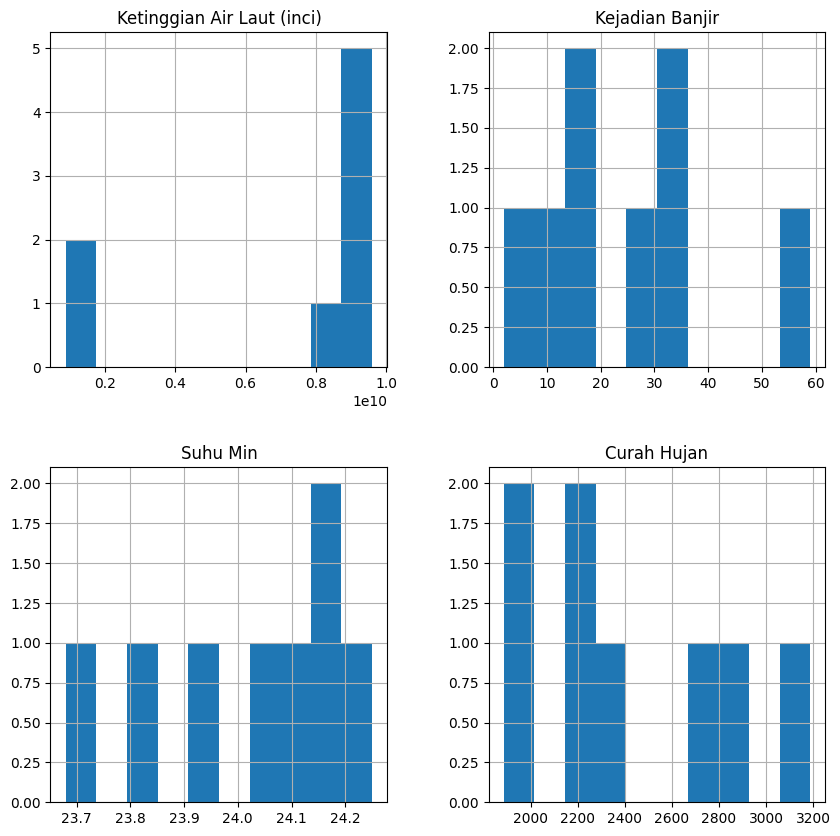

In [ ]:
data_gabungan_jakarta_total.hist(figsize=(10,10))

In [ ]:
X = data_gabungan_jakarta_total.drop(["Kejadian Banjir"],axis=1)
Y = data_gabungan_jakarta_total["Kejadian Banjir"]

In [ ]:
X

Ketinggian Air Laut (inci)   Suhu Min  Curah Hujan
Tahun                                                    
2013                 8.913386e+09  24.180000  2331.900000
2014                 8.579036e+09  23.850000  2198.600000
2015                 8.924984e+08  23.680000  1917.900000
2016                 9.048399e+09  24.250000  2864.000000
2017                 9.110986e+08  24.110000  2727.800000
2018                 9.234521e+09  23.930000  2236.300000
2019                 9.480223e+09  24.030000  1886.500000
2020                 9.592477e+09  24.180000  3187.700000
2021                 9.619959e+00  24.712386  3444.400107
2022                 8.566050e+00  23.552991  3433.453896
2023                 9.510837e+00  22.575570  3483.617868

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_regressi = linear_model.LinearRegression()

In [ ]:
model_regressi.fit(X,Y)

LinearRegression()

In [ ]:
Y_pred = model_regressi.predict(X)

In [ ]:
Y_pred

array([19.77718387, 24.85924843,  3.98631517, 38.6386001 , 21.53851735,
       24.99741077,  8.40629021, 54.79643409])

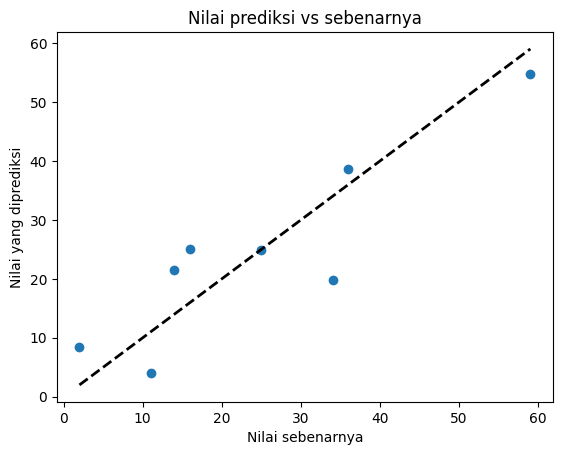

In [ ]:
plt.scatter(Y, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Nilai sebenarnya')
plt.ylabel('Nilai yang diprediksi')
plt.title('Nilai prediksi vs sebenarnya')
plt.show()

In [ ]:
print("Coefficient  : ", model_regressi.coef_)
print("Intercept    : ", model_regressi.intercept_)
print("Mean Squared Error (MSE) : {:.2f}".format(mean_squared_error(Y,Y_pred)))
print("Prediction               : {:.2f}".format(r2_score(Y, Y_pred)))

Coefficient  :  [ 2.01669099e-09 -3.33262137e+01  3.93196238e-02]
Intercept    :  715.9400565907773
Mean Squared Error (MSE) : 56.87
Prediction               : 0.80


In [ ]:
model_regressi.score(X,Y)

0.8007966897895773

In [ ]:
import random
random.seed(0)
i=1
target_number_1 = 9
target_number_2 = 23.5
target_number_3 = 3500
range_percentage = 10
himpunan_nilai_acak=[]
tahun=2021

while i<=3:
  himpunan_nilai_acak=[]
  range_value_1 = target_number_1 * range_percentage / 100
  range_value_2 = target_number_2 * range_percentage / 100
  range_value_3 = target_number_3 * range_percentage / 100

  random_number_1 = random.uniform(target_number_1 - range_value_1, target_number_1 + range_value_1)
  random_number_2 = random.uniform(target_number_2 - range_value_2, target_number_2 + range_value_2)
  random_number_3 = random.uniform(target_number_3 - range_value_3, target_number_3 + range_value_3)

  #himpunan_nilai_acak.append(tahun)
  himpunan_nilai_acak.append(random_number_1)
  himpunan_nilai_acak.append(random_number_2)
  himpunan_nilai_acak.append(random_number_3)

  X.loc[len(X)] = himpunan_nilai_acak
  tahun+=1
  i+=1

In [ ]:
X.rename(index={8:2021,9:2022,10:2023},inplace=True)

In [ ]:
X

Ketinggian Air Laut (inci)   Suhu Min  Curah Hujan
Tahun                                                    
2013                 8.913386e+09  24.180000  2331.900000
2014                 8.579036e+09  23.850000  2198.600000
2015                 8.924984e+08  23.680000  1917.900000
2016                 9.048399e+09  24.250000  2864.000000
2017                 9.110986e+08  24.110000  2727.800000
2018                 9.234521e+09  23.930000  2236.300000
2019                 9.480223e+09  24.030000  1886.500000
2020                 9.592477e+09  24.180000  3187.700000
2021                 9.619959e+00  24.712386  3444.400107
2022                 8.566050e+00  23.552991  3433.453896
2023                 9.510837e+00  22.575570  3483.617868

In [ ]:
data_gabungan_jakarta_total = data_gabungan_jakarta_total.append(X[-3:])

In [ ]:
himpunan_predik=[]
i=8
while i<=10:
  hasil_predik = model_regressi.predict([X.iloc[i]])
  i+=1
  himpunan_predik.append((hasil_predik[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
data_predik = pandas.DataFrame(columns={"Tahun","Prediksi"})
data_predik["Tahun"]=[2021,2022,2023]
data_predik["Prediksi"]=himpunan_predik

In [ ]:
import math
fix_himpunan_final=[]
for i in data_predik["Prediksi"]:
   i = math.ceil(i)
   fix_himpunan_final.append(i)
data_predik["Prediksi"] = fix_himpunan_final

In [ ]:
data_gabungan_jakarta_total["Kejadian Banjir"].iloc[-3:] = data_predik["Prediksi"]

In [ ]:
data_gabungan_jakarta_total

Ketinggian Air Laut (inci)  Kejadian Banjir   Suhu Min  Curah Hujan
Tahun                                                                     
2013                 8.913386e+09             34.0  24.180000  2331.900000
2014                 8.579036e+09             25.0  23.850000  2198.600000
2015                 8.924984e+08             11.0  23.680000  1917.900000
2016                 9.048399e+09             36.0  24.250000  2864.000000
2017                 9.110986e+08             14.0  24.110000  2727.800000
2018                 9.234521e+09             16.0  23.930000  2236.300000
2019                 9.480223e+09              2.0  24.030000  1886.500000
2020                 9.592477e+09             59.0  24.180000  3187.700000
2021                 9.619959e+00             28.0  24.712386  3444.400107
2022                 8.566050e+00             67.0  23.552991  3433.453896
2023                 9.510837e+00            101.0  22.575570  3483.617868

In [ ]:
data_gabungan_jakarta_total["Kejadian Banjir"]=data_gabungan_jakarta_total["Kejadian Banjir"].astype(int)

In [ ]:
data_gabungan_jakarta_total

Ketinggian Air Laut (inci)  Kejadian Banjir   Suhu Min  Curah Hujan
Tahun                                                                     
2013                 8.913386e+09               34  24.180000  2331.900000
2014                 8.579036e+09               25  23.850000  2198.600000
2015                 8.924984e+08               11  23.680000  1917.900000
2016                 9.048399e+09               36  24.250000  2864.000000
2017                 9.110986e+08               14  24.110000  2727.800000
2018                 9.234521e+09               16  23.930000  2236.300000
2019                 9.480223e+09                2  24.030000  1886.500000
2020                 9.592477e+09               59  24.180000  3187.700000
2021                 9.619959e+00               28  24.712386  3444.400107
2022                 8.566050e+00               67  23.552991  3433.453896
2023                 9.510837e+00              101  22.575570  3483.617868

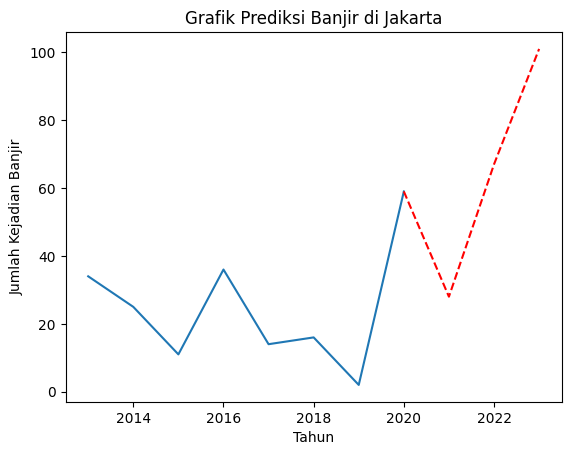

In [ ]:
plt.plot(data_gabungan_jakarta_total.index[:-3],data_gabungan_jakarta_total["Kejadian Banjir"][:-3])
plt.plot(data_gabungan_jakarta_total.index[-4:],data_gabungan_jakarta_total["Kejadian Banjir"][-4:],linestyle='dashed',color="Red")
plt.title("Grafik Prediksi Banjir di Jakarta")
plt.ylabel('Jumlah Kejadian Banjir')
plt.xlabel('Tahun')
plt.show()

### B. Univariate Regression

#### Statistical

##### Moving Average

In [ ]:
data = pandas.read_csv("./Dataset/Banjir/rekap_ketinggian_banjir_2017_2020_revisi.csv")

In [ ]:
data.head()

bulan  Tahun  rata_rata_ketinggian_air
0  2017-01   2017                      40.0
1  2017-02   2017                     130.0
2  2017-03   2017                      80.0
3  2017-04   2017                     105.0
4  2017-05   2017                      62.5

In [ ]:
subset = data[["bulan","rata_rata_ketinggian_air"]]

In [ ]:
subset.head()

bulan  rata_rata_ketinggian_air
0  2017-01                      40.0
1  2017-02                     130.0
2  2017-03                      80.0
3  2017-04                     105.0
4  2017-05                      62.5

In [ ]:
subset["bulan"]=pandas.to_datetime(subset["bulan"])

<ipython-input-127-5986726dd6fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
subset.head()

bulan  rata_rata_ketinggian_air
0 2017-01-01                      40.0
1 2017-02-01                     130.0
2 2017-03-01                      80.0
3 2017-04-01                     105.0
4 2017-05-01                      62.5

In [ ]:
data_train = subset.iloc[:-int(len(data)*0.2)]
data_test  = subset.iloc[-int(len(data)*0.2):]

In [ ]:
data_train.tail()

bulan  rata_rata_ketinggian_air
34 2019-11-01                       0.0
35 2019-12-01                      57.5
36 2020-01-01                     180.0
37 2020-02-01                     102.5
38 2020-03-01                      82.5

In [ ]:
data_test["rata_rata_prediksi"] = data_train["rata_rata_ketinggian_air"].mean()

<ipython-input-131-74f167bec828>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_test

bulan  rata_rata_ketinggian_air  rata_rata_prediksi
39 2020-04-01                      70.0           55.935897
40 2020-05-01                     105.0           55.935897
41 2020-06-01                      62.5           55.935897
42 2020-07-01                      35.0           55.935897
43 2020-08-01                      45.0           55.935897
44 2020-09-01                      70.0           55.935897
45 2020-10-01                      95.0           55.935897
46 2020-11-01                      35.0           55.935897
47 2020-12-01                      45.0           55.935897

(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01')])

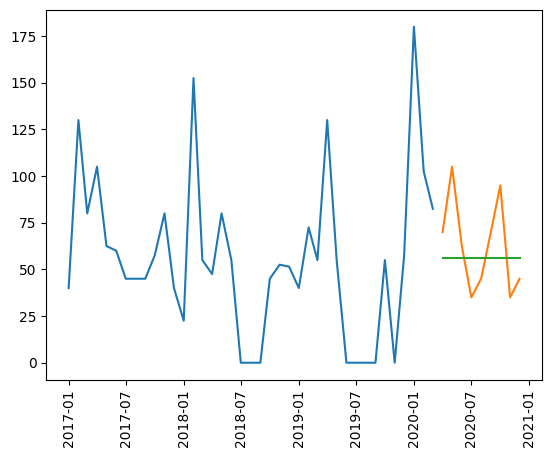

In [ ]:
plt.plot(data_train['bulan'],data_train['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_prediksi'])
plt.xticks(rotation=90)

Tampak hasil datar yang dihasilkan dari model statistika moving average.

##### Naive Forecasting

In [ ]:
data_test['naive_forecast'] = data_train['rata_rata_ketinggian_air'].iloc[-1]

<ipython-input-134-2c5a23c4cbab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_test

bulan  rata_rata_ketinggian_air  rata_rata_prediksi  naive_forecast
39 2020-04-01                      70.0           55.935897            82.5
40 2020-05-01                     105.0           55.935897            82.5
41 2020-06-01                      62.5           55.935897            82.5
42 2020-07-01                      35.0           55.935897            82.5
43 2020-08-01                      45.0           55.935897            82.5
44 2020-09-01                      70.0           55.935897            82.5
45 2020-10-01                      95.0           55.935897            82.5
46 2020-11-01                      35.0           55.935897            82.5
47 2020-12-01                      45.0           55.935897            82.5

(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01')])

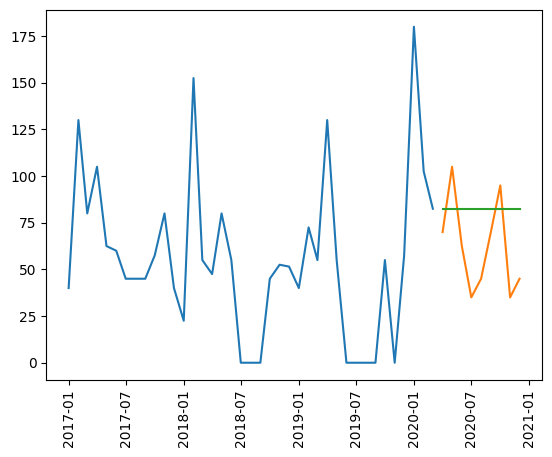

In [ ]:
plt.plot(data_train['bulan'],data_train['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['naive_forecast'])
plt.xticks(rotation=90)

Tampak hasil datar yang dihasilkan dari model statistika naive.

##### Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
es = SimpleExpSmoothing(data_train["rata_rata_ketinggian_air"])

In [ ]:
model_es = es.fit()

In [ ]:
prediksi_es = model_es.forecast(9)

In [ ]:
start=len(data_train)
end  =len(data_train)+len(data_train)-1
prediksi_es.index=subset["bulan"][start:end+1]
print(prediksi_es)

bulan
2020-04-01    55.935744
2020-05-01    55.935744
2020-06-01    55.935744
2020-07-01    55.935744
2020-08-01    55.935744
2020-09-01    55.935744
2020-10-01    55.935744
2020-11-01    55.935744
2020-12-01    55.935744
dtype: float64


In [ ]:
prediksi_es

bulan
2020-04-01    55.935744
2020-05-01    55.935744
2020-06-01    55.935744
2020-07-01    55.935744
2020-08-01    55.935744
2020-09-01    55.935744
2020-10-01    55.935744
2020-11-01    55.935744
2020-12-01    55.935744
dtype: float64

(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01')])

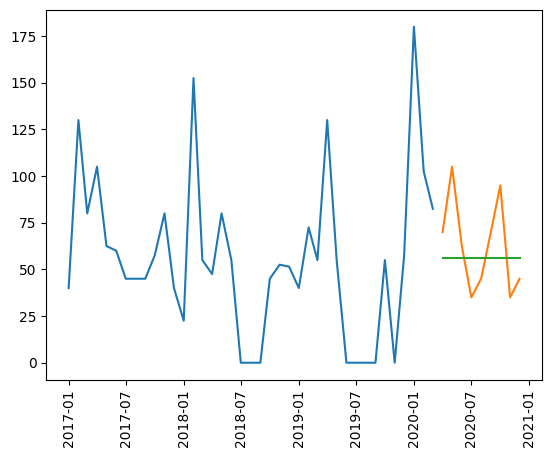

In [ ]:
plt.plot(data_train['bulan'],data_train['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_ketinggian_air'])
plt.plot(prediksi_es.index,prediksi_es)
plt.xticks(rotation=90)

In [ ]:
model_es = es.fit(smoothing_level = 0.2, optimized=True)

In [ ]:
prediksi_es = model_es.forecast(9)

In [ ]:
start=len(data_train)
end  =len(data_train)+len(data_train)-1
prediksi_es.index=subset["bulan"][start:end+1]
print(prediksi_es)

bulan
2020-04-01    72.212248
2020-05-01    72.212248
2020-06-01    72.212248
2020-07-01    72.212248
2020-08-01    72.212248
2020-09-01    72.212248
2020-10-01    72.212248
2020-11-01    72.212248
2020-12-01    72.212248
dtype: float64


(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01')])

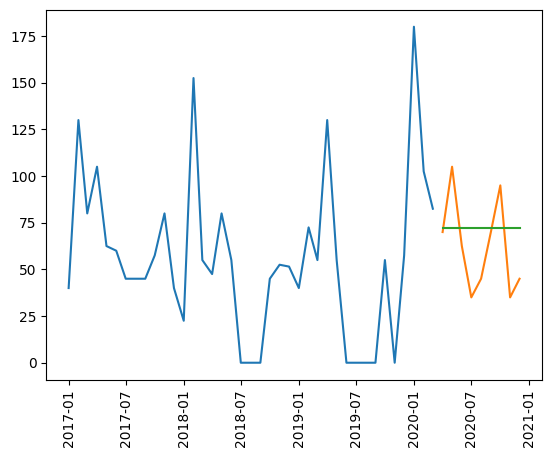

In [ ]:
plt.plot(data_train['bulan'],data_train['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_ketinggian_air'])
plt.plot(prediksi_es.index,prediksi_es)
plt.xticks(rotation=90)

In [ ]:
model_es = es.fit(smoothing_level = 1.0, optimized=True)

In [ ]:
prediksi_es = model_es.forecast(9)

In [ ]:
start=len(data_train)
end  =len(data_train)+len(data_train)-1
prediksi_es.index=subset["bulan"][start:end+1]
print(prediksi_es)

bulan
2020-04-01    82.5
2020-05-01    82.5
2020-06-01    82.5
2020-07-01    82.5
2020-08-01    82.5
2020-09-01    82.5
2020-10-01    82.5
2020-11-01    82.5
2020-12-01    82.5
dtype: float64


(array([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,
        18628.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01')])

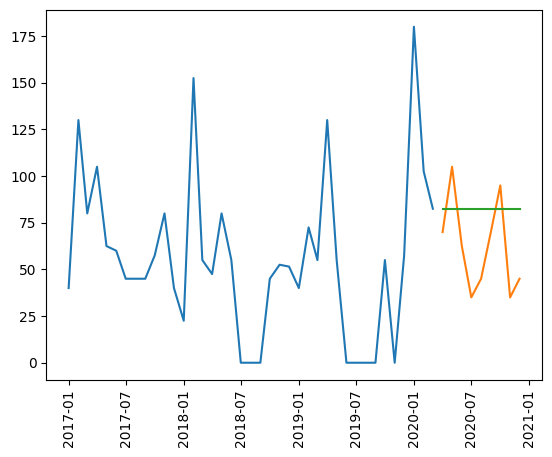

In [ ]:
plt.plot(data_train['bulan'],data_train['rata_rata_ketinggian_air'])
plt.plot(data_test['bulan'],data_test['rata_rata_ketinggian_air'])
plt.plot(prediksi_es.index,prediksi_es)
plt.xticks(rotation=90)

Tampak hasil datar yang dihasilkan dari model statistika exponential smoothing.

#### Machine Learning

##### Prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
data = pandas.read_csv('./Dataset/Banjir/rekap_ketinggian_banjir_2017_2020_revisi.csv')

In [ ]:
data.head()

bulan  Tahun  rata_rata_ketinggian_air
0  2017-01   2017                      40.0
1  2017-02   2017                     130.0
2  2017-03   2017                      80.0
3  2017-04   2017                     105.0
4  2017-05   2017                      62.5

In [ ]:
subset = data[['bulan','rata_rata_ketinggian_air']]

In [ ]:
subset

bulan  rata_rata_ketinggian_air
0   2017-01                      40.0
1   2017-02                     130.0
2   2017-03                      80.0
3   2017-04                     105.0
4   2017-05                      62.5
5   2017-06                      60.0
6   2017-07                      45.0
7   2017-08                      45.0
8   2017-09                      45.0
9   2017-10                      57.5
10  2017-11                      80.0
11  2017-12                      40.0
12  2018-01                      22.5
13  2018-02                     152.5
14  2018-03                      55.0
15  2018-04                      47.5
16  2018-05                      80.0
17  2018-06                      55.0
18  2018-07                       0.0
19  2018-08                       0.0
20  2018-09                       0.0
21  2018-10                      45.0
22  2018-11                      52.5
23  2018-12                      51.5
24  2019-01                      40.0
25  2019-02                      72.5
26  2019-03                      55.0
27  2019-04                     130.0
28  2019-05                      55.0
29  2019-06                       0.0
30  2019-07                       0.0
31  2019-08                       0.0
32  2019-09                       0.0
33  2019-10                      55.0
34  2019-11                       0.0
35  2019-12                      57.5
36  2020-01                     180.0
37  2020-02                     102.5
38  2020-03                      82.5
39  2020-04                      70.0
40  2020-05                     105.0
41  2020-06                      62.5
42  2020-07                      35.0
43  2020-08                      45.0
44  2020-09                      70.0
45  2020-10                      95.0
46  2020-11                      35.0
47  2020-12                      45.0

<Axes: >

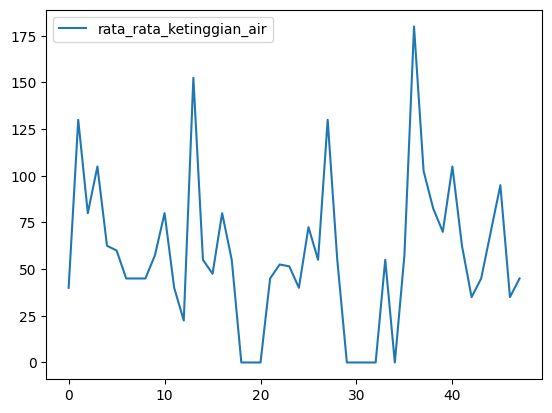

In [ ]:
subset.plot()

In [ ]:
subset.columns = ['ds','y']

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      48 non-null     object 
 1   y       48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [ ]:
subset['ds'] = pandas.to_datetime(subset['ds'])

<ipython-input-160-c8b95808f11d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
subset.head()

ds      y
0 2017-01-01   40.0
1 2017-02-01  130.0
2 2017-03-01   80.0
3 2017-04-01  105.0
4 2017-05-01   62.5

In [ ]:
subset.shape

(48, 2)

In [ ]:
data_train = subset.iloc[:-12]
data_test  = subset.iloc[-12:]

In [ ]:
data_train

ds      y
0  2017-01-01   40.0
1  2017-02-01  130.0
2  2017-03-01   80.0
3  2017-04-01  105.0
4  2017-05-01   62.5
5  2017-06-01   60.0
6  2017-07-01   45.0
7  2017-08-01   45.0
8  2017-09-01   45.0
9  2017-10-01   57.5
10 2017-11-01   80.0
11 2017-12-01   40.0
12 2018-01-01   22.5
13 2018-02-01  152.5
14 2018-03-01   55.0
15 2018-04-01   47.5
16 2018-05-01   80.0
17 2018-06-01   55.0
18 2018-07-01    0.0
19 2018-08-01    0.0
20 2018-09-01    0.0
21 2018-10-01   45.0
22 2018-11-01   52.5
23 2018-12-01   51.5
24 2019-01-01   40.0
25 2019-02-01   72.5
26 2019-03-01   55.0
27 2019-04-01  130.0
28 2019-05-01   55.0
29 2019-06-01    0.0
30 2019-07-01    0.0
31 2019-08-01    0.0
32 2019-09-01    0.0
33 2019-10-01   55.0
34 2019-11-01    0.0
35 2019-12-01   57.5

In [ ]:
model = Prophet()

In [ ]:
model.fit(data_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5cejbjq/ge6yjyzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5cejbjq/sv19s62r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17673', 'data', 'file=/tmp/tmpa5cejbjq/ge6yjyzi.json', 'init=/tmp/tmpa5cejbjq/sv19s62r.json', 'output', 'file=/tmp/tmpa5cejbjq/prophet_modelbyy_un2c/prophet_model-20230705080539.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
masa_depan = model.make_future_dataframe(periods=36,freq='MS')
prediksi = model.predict(masa_depan)

In [ ]:
prediksi.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
67 2022-08-01 -21.262175  -60.087397  -22.918571   -21.262181   -21.262168   
68 2022-09-01 -22.445778  -59.320104  -22.728874   -22.445784   -22.445771   
69 2022-10-01 -23.591201  -22.304812   15.596627   -23.591207   -23.591193   
70 2022-11-01 -24.774804  -30.124377    7.250088   -24.774811   -24.774796   
71 2022-12-01 -25.920227  -26.787580   11.627577   -25.920234   -25.920218   

    additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
67      -19.592951            -19.592951            -19.592951 -19.592951   
68      -18.445355            -18.445355            -18.445355 -18.445355   
69       20.365886             20.365886             20.365886  20.365886   
70       13.134282             13.134282             13.134282  13.134282   
71       19.715119             19.715119             19.715119  19.715119   

    yearly_lower  yearly_upper  multiplicative_terms  \
67    -19.592951    -19.592951                   0.0   
68    -18.445355    -18.445355                   0.0   
69     20.365886     20.365886                   0.0   
70     13.134282     13.134282                   0.0   
71     19.715119     19.715119                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper       yhat  
67                         0.0                         0.0 -40.855126  
68                         0.0                         0.0 -40.891133  
69                         0.0                         0.0  -3.225315  
70                         0.0                         0.0 -11.640522  
71                         0.0                         0.0  -6.205108

In [ ]:
prediksi[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
67 2022-08-01 -40.855126  -60.087397  -22.918571
68 2022-09-01 -40.891133  -59.320104  -22.728874
69 2022-10-01  -3.225315  -22.304812   15.596627
70 2022-11-01 -11.640522  -30.124377    7.250088
71 2022-12-01  -6.205108  -26.787580   11.627577

In [ ]:
plot_plotly(model,prediksi)

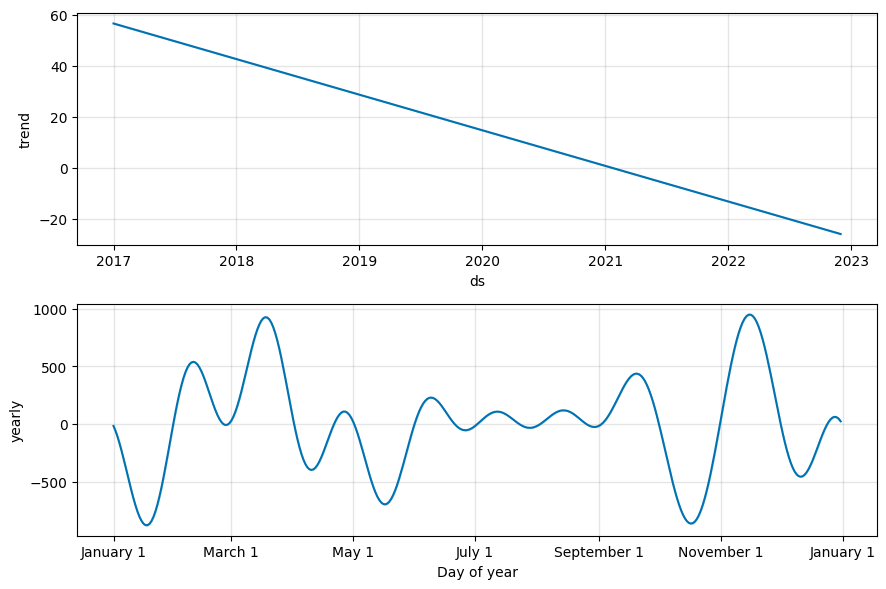

In [ ]:
fig1 = model.plot_components(prediksi)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predik = prediksi.iloc[-12:]['yhat']

In [ ]:
print(rmse(predik,data_test['y']))
print(data_test['y'].mean())

93.12175281649954
77.29166666666667


In [ ]:
model_2 = Prophet(changepoint_prior_scale=0.3)

In [ ]:
model_2.fit(data_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj943cs12/0ilglwp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj943cs12/a_nz7p6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76868', 'data', 'file=/tmp/tmpj943cs12/0ilglwp_.json', 'init=/tmp/tmpj943cs12/a_nz7p6a.json', 'output', 'file=/tmp/tmpj943cs12/prophet_modelo8cjie08/prophet_model-20230704003527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
masa_depan_2 = model_2.make_future_dataframe(periods=36,freq='MS')
prediksi_2 = model_2.predict(masa_depan_2)

In [ ]:
plot_plotly(model_2,prediksi_2)

In [ ]:
predik_2 = prediksi_2.iloc[-12:]['yhat']

In [ ]:
print(rmse(predik_2,data_test['y']))
print(data_test['y'].mean())

92.9328529710402
77.29166666666667


In [ ]:
def get_changepoint_idx(length, n_changepoints, changepoint_range = 0.8):
    historical_size = int(numpy.floor(length * changepoint_range))
    return numpy.linspace(0, historical_size -1, n_changepoints+1).round().astype(int)[1:]

def make_changepoint_features(n, changes_idx):
    linear = numpy.arange(n).reshape(-1,1)
    features = [linear]
    for i in changes_idx:
        slope_features = numpy.zeros(n)
        slope_features[i:] = numpy.arange(0, n-i)
        slope_features = slope_features.reshape(-1,1)
        features.append(slope_features)
    features = numpy.concatenate(features, axis=1)
    return features

In [ ]:
changepoint_prior_scale = 0.3
model_3 = Prophet(n_changepoints=15, changepoint_prior_scale=changepoint_prior_scale, growth='linear', uncertainty_samples=None, yearly_seasonality=False)
model_3.fit(data_train)
masa_depan_3 = model_3.make_future_dataframe(periods=36,freq='MS')
prediksi_3 = model_3.predict(masa_depan_3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj943cs12/wjb_kk8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj943cs12/ew5wv3tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75219', 'data', 'file=/tmp/tmpj943cs12/wjb_kk8f.json', 'init=/tmp/tmpj943cs12/ew5wv3tq.json', 'output', 'file=/tmp/tmpj943cs12/prophet_model23ccgllh/prophet_model-20230704003527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
initial_slope = model_3.params['k'][0]
intercept = model_3.params['m'][0]
deltas_coefs = model_3.params['delta'][0]
features_coefs = numpy.concatenate([initial_slope, deltas_coefs])

In [ ]:
scale = subset.y.max()
idx = get_changepoint_idx(len(subset), 15)
comb_features = make_changepoint_features(len(subset), idx)/len(subset)

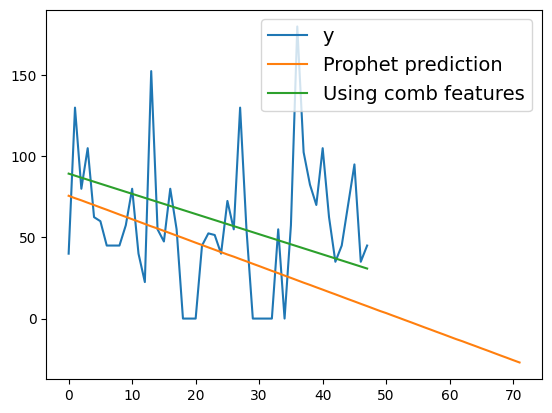

In [ ]:
subset.y.plot()
prediksi_3.yhat.plot(label='Prophet prediction')
pandas.Series(((comb_features * features_coefs).sum(axis=1) +intercept) * scale).plot(label='Using comb features')
plt.legend(fontsize=14)

In [ ]:
predik_3 = prediksi_3.iloc[-12:]['yhat']

In [ ]:
plot_plotly(model_3,prediksi_3)

hasil akhir

In [ ]:
plot_plotly(model_2,prediksi_2)

Pada prediksi di atas tampak adanya penurunan rata-rata tingi air dari tahun ke tahun.

##### ARIMA

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pandas.read_csv("./Dataset/Banjir/rekap_ketinggian_banjir_2017_2020_revisi.csv")

In [ ]:
data

bulan  Tahun  rata_rata_ketinggian_air
0   2017-01   2017                      40.0
1   2017-02   2017                     130.0
2   2017-03   2017                      80.0
3   2017-04   2017                     105.0
4   2017-05   2017                      62.5
5   2017-06   2017                      60.0
6   2017-07   2017                      45.0
7   2017-08   2017                      45.0
8   2017-09   2017                      45.0
9   2017-10   2017                      57.5
10  2017-11   2017                      80.0
11  2017-12   2017                      40.0
12  2018-01   2018                      22.5
13  2018-02   2018                     152.5
14  2018-03   2018                      55.0
15  2018-04   2018                      47.5
16  2018-05   2018                      80.0
17  2018-06   2018                      55.0
18  2018-07   2018                       0.0
19  2018-08   2018                       0.0
20  2018-09   2018                       0.0
21  2018-10   2018                      45.0
22  2018-11   2018                      52.5
23  2018-12   2018                      51.5
24  2019-01   2019                      40.0
25  2019-02   2019                      72.5
26  2019-03   2019                      55.0
27  2019-04   2019                     130.0
28  2019-05   2019                      55.0
29  2019-06   2019                       0.0
30  2019-07   2019                       0.0
31  2019-08   2019                       0.0
32  2019-09   2019                       0.0
33  2019-10   2019                      55.0
34  2019-11   2019                       0.0
35  2019-12   2019                      57.5
36  2020-01   2020                     180.0
37  2020-02   2020                     102.5
38  2020-03   2020                      82.5
39  2020-04   2020                      70.0
40  2020-05   2020                     105.0
41  2020-06   2020                      62.5
42  2020-07   2020                      35.0
43  2020-08   2020                      45.0
44  2020-09   2020                      70.0
45  2020-10   2020                      95.0
46  2020-11   2020                      35.0
47  2020-12   2020                      45.0

In [ ]:
data["bulan"]=pandas.to_datetime(data["bulan"])

In [ ]:
data.head()

bulan  Tahun  rata_rata_ketinggian_air
0 2017-01-01   2017                      40.0
1 2017-02-01   2017                     130.0
2 2017-03-01   2017                      80.0
3 2017-04-01   2017                     105.0
4 2017-05-01   2017                      62.5

In [ ]:
subset_data = data[['bulan','rata_rata_ketinggian_air']]

In [ ]:
fig = px.line(subset_data,x="bulan",y="rata_rata_ketinggian_air")
fig.show()

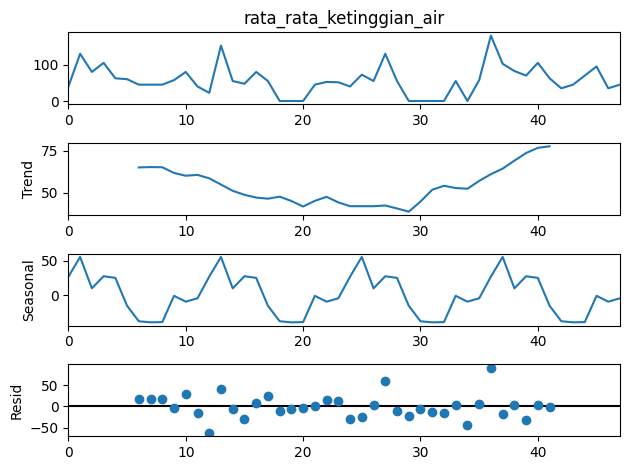

In [ ]:
dekomposisi=seasonal_decompose(subset_data["rata_rata_ketinggian_air"], model='additive',period=12)
fig = dekomposisi.plot()
plt.show()

In [ ]:
def uji_coba_adfuller(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Datanya stasioner.")
    else:
        print("Data tidak stasioner")

In [ ]:
uji_coba_adfuller(subset_data["rata_rata_ketinggian_air"])

ADF Test Statistic : -4.879288751566467
p-value : 3.826039405160863e-05
#Lags Used : 0
Number of Observations : 47
Datanya stasioner.


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

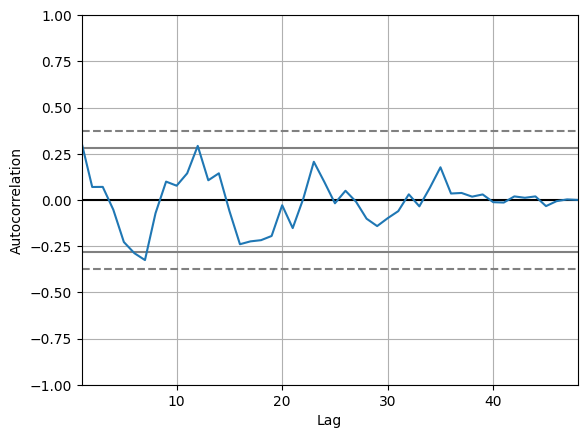

In [ ]:
autocorrelation_plot(data["rata_rata_ketinggian_air"])

In [ ]:
subset_data["rata_rata_ketinggian_air"].shape

(48,)

In [ ]:
data_train = subset_data[:24]
data_test  = subset_data[24:]

In [ ]:
data_train.set_index('bulan')

rata_rata_ketinggian_air
bulan                               
2017-01-01                      40.0
2017-02-01                     130.0
2017-03-01                      80.0
2017-04-01                     105.0
2017-05-01                      62.5
2017-06-01                      60.0
2017-07-01                      45.0
2017-08-01                      45.0
2017-09-01                      45.0
2017-10-01                      57.5
2017-11-01                      80.0
2017-12-01                      40.0
2018-01-01                      22.5
2018-02-01                     152.5
2018-03-01                      55.0
2018-04-01                      47.5
2018-05-01                      80.0
2018-06-01                      55.0
2018-07-01                       0.0
2018-08-01                       0.0
2018-09-01                       0.0
2018-10-01                      45.0
2018-11-01                      52.5
2018-12-01                      51.5

In [ ]:
data_test.set_index("bulan")

rata_rata_ketinggian_air
bulan                               
2019-01-01                      40.0
2019-02-01                      72.5
2019-03-01                      55.0
2019-04-01                     130.0
2019-05-01                      55.0
2019-06-01                       0.0
2019-07-01                       0.0
2019-08-01                       0.0
2019-09-01                       0.0
2019-10-01                      55.0
2019-11-01                       0.0
2019-12-01                      57.5
2020-01-01                     180.0
2020-02-01                     102.5
2020-03-01                      82.5
2020-04-01                      70.0
2020-05-01                     105.0
2020-06-01                      62.5
2020-07-01                      35.0
2020-08-01                      45.0
2020-09-01                      70.0
2020-10-01                      95.0
2020-11-01                      35.0
2020-12-01                      45.0

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 24 to 47
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   bulan                     24 non-null     datetime64[ns]
 1   rata_rata_ketinggian_air  24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 516.0 bytes


In [ ]:
print(data_train.shape)
print(data_test.shape)

(24, 2)
(24, 2)


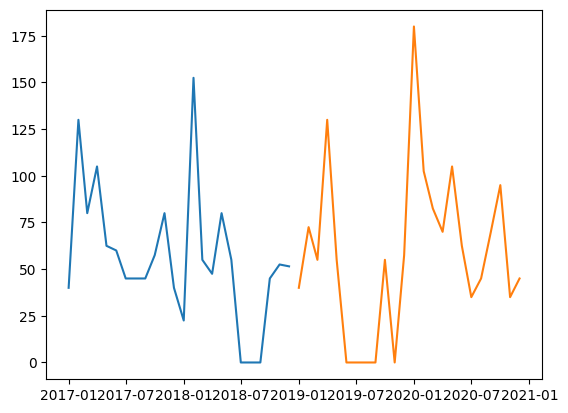

In [ ]:
plt.plot(data_train["bulan"],data_train["rata_rata_ketinggian_air"])
plt.plot(data_test["bulan"],data_test["rata_rata_ketinggian_air"])

In [ ]:
model = auto_arima(subset_data["rata_rata_ketinggian_air"],start_p=0,d=1,
                  start_q=0,max_p=5,max_d=5,trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=499.651, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=496.400, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=497.651, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=493.621, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=495.135, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=491.633, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=494.408, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=493.152, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best mode

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -242.817
Date:                Tue, 04 Jul 2023   AIC                            491.633
Time:                        00:35:36   BIC                            497.184
Sample:                             0   HQIC                           493.722
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4304      0.155     -2.784      0.005      -0.734      -0.127
ar.L2         -0.3229      0.185     -1.749      0.080      -0.685       0.039
sigma2      1785.8515    369.217      4.837      0.000    1062.200    2509.503
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.63
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.07
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar=sm.tsa.arima.ARIMA(data_train["rata_rata_ketinggian_air"],order=(2,1,0))
model_fit=model_ar.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     rata_rata_ketinggian_air   No. Observations:                   24
Model:                       ARIMA(2, 1, 0)   Log Likelihood                -116.850
Date:                      Tue, 04 Jul 2023   AIC                            239.701
Time:                              00:35:36   BIC                            243.107
Sample:                                   0   HQIC                           240.557
                                       - 24                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6147      0.281     -2.191      0.028      -1.165      -0.065
ar.L2         -0.3617      0.302     -1.199      0.231      -0.953       0.230
sigma2      1481.4684    557.883      2.656      0.008     388.038    2574.899
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.18
Prob(Q):                              1.00   Prob(JB):                         0.12
Heteroskedasticity (H):               0.95   Skew:                             0.99
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(data_train)
end  =len(data_train)+len(data_train)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=subset_data["bulan"][start:end+1]
print(pred)

bulan
2019-01-01    49.401944
2019-02-01    51.053372
2019-03-01    50.797076
2019-04-01    50.357299
2019-05-01    50.720344
2019-06-01    50.656241
2019-07-01    50.564332
2019-08-01    50.644017
2019-09-01    50.628276
2019-10-01    50.609130
2019-11-01    50.626593
2019-12-01    50.622783
2020-01-01    50.618809
2020-02-01    50.622630
2020-03-01    50.621718
2020-04-01    50.620897
2020-05-01    50.621731
2020-06-01    50.621516
2020-07-01    50.621346
2020-08-01    50.621528
2020-09-01    50.621478
2020-10-01    50.621443
2020-11-01    50.621483
2020-12-01    50.621471
Name: predicted_mean, dtype: float64


(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10'),
  Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01')])

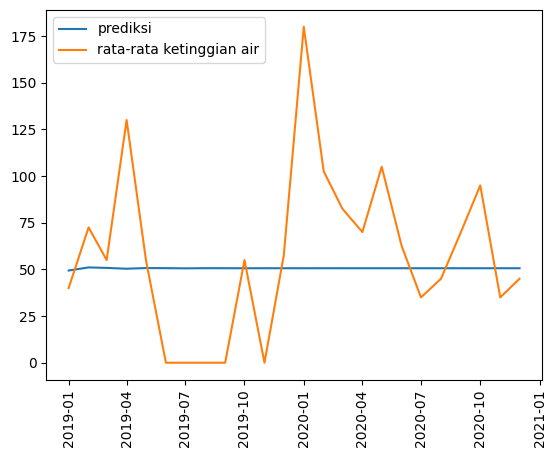

In [ ]:
#pred.plot(legend=True)
plt.plot(pred,label="prediksi")
plt.plot(data_test["bulan"],data_test['rata_rata_ketinggian_air'],label="rata-rata ketinggian air")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

In [ ]:
rmse = sqrt(mean_squared_error(pred, data_test['rata_rata_ketinggian_air']))
print(rmse)

44.07599185144961


In [ ]:
data_test['rata_rata_ketinggian_air'].mean()

58.020833333333336

In [ ]:
model_2 = sm.tsa.arima.ARIMA(subset_data['rata_rata_ketinggian_air'],order=(1,0,5))
model_2 = model_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
subset_data.tail()

bulan  rata_rata_ketinggian_air
43 2020-08-01                      45.0
44 2020-09-01                      70.0
45 2020-10-01                      95.0
46 2020-11-01                      35.0
47 2020-12-01                      45.0

In [ ]:
masa_depan = pandas.date_range(start='2022/01/01',end='2023/01/01',freq='m')
pred_2 = model_2.predict(start=len(subset_data),end=len(subset_data)+11,typ='levels').rename('prediksi_arima')
pred_2.index = masa_depan
print(pred_2)

2022-01-31    57.835789
2022-02-28    48.114836
2022-03-31    34.567857
2022-04-30    46.468409
2022-05-31    49.085446
2022-06-30    50.660489
2022-07-31    51.772561
2022-08-31    52.557749
2022-09-30    53.112137
2022-10-31    53.503567
2022-11-30    53.779940
2022-12-31    53.975075
Freq: M, Name: prediksi_arima, dtype: float64


<Axes: >

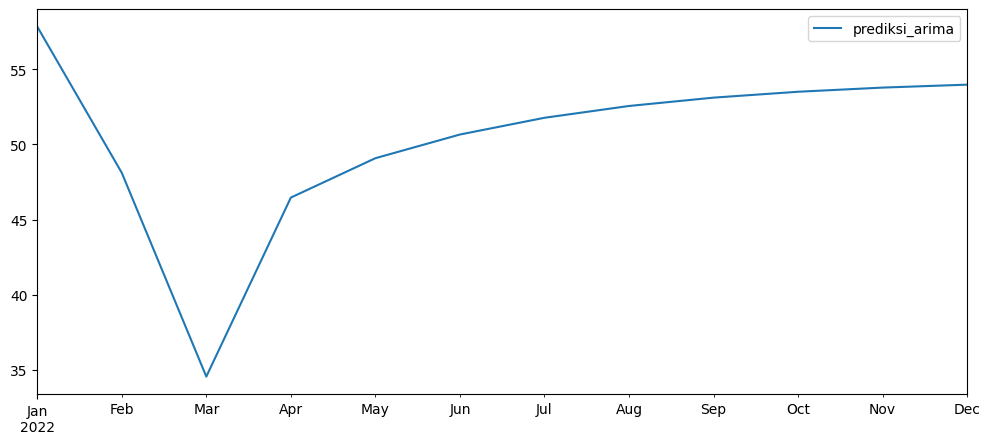

In [ ]:
pred_2.plot(figsize=(12,5),legend=True)

Pada prediksi di atas, tampak adanya penurunan rata-rata pada bulan Maret sebelum akhirnya mulai naik kembali saat masuk bulan April 2022.

# Kesimpulan

1. Dari tahun 2013 hingga 2020, banjir paling banyak terjadi pada tahun 2020.
2. Dari tahun 2013 hingga 2020, banjir paling banyak terjadi pada kota Jakarta Timur.
3. Ada beberapa penyebab banjir di Jakarta :
<br>
a. Intensitas curah hujan tinggi
<br>
b. Tingginya permukaan air laut
<br>
Hal-hal tersebut menyebabkan meluapnya sungai yang mengakibatkan banjir terutama pada daerah di sekitar sungai. Hal ini dibuktikan dengan pemetaan 3 kelurahan di Jakarta Timur dan Jakarta Selatan yang paling banyak terkena banjir adalah kelurahan yang letaknya dekat dengan kali/sungai seperti sungai Ciliwung.
3. Musim hujan di Jakarta semakin tidak menentu dikarenakan perubahan iklim.
4. Jika dibiarkan, maka banjir akan terus terjadi dan terulang sepanjang tahun.


# Rekomendasi

1.   Penambahan lokasi drainase oleh pemerintah terutama pada daerah-daerah yang rawan banjir dan dekat dengan sungai.
2.   Penambahan kedalaman lubang drainase vertikal oleh pemerintah terutama pada daerah-daerah yang rawan banjir dan dekat dengan sungai.
3.   Normalisasi sungai-sungai oleh pemerintah bersama dengan masyarakat sehingga aliran air lancar terutama saat musim hujan datang.
4.   Penambahan Ruang Terbuka Hijau(RTH) sehingga dapat membantu menyerap air hujan, dan mengurangi kemungkinan banjir.
5.   Perbaikan sensor alarm pada setiap kanal, sehingga dapat mendeteksi banjir dan memberitahu warga sedini mungkin.